In [1]:
import sys 
sys.path.append('./src/')

import nn_lstm as nn
import pandas as pd
import numpy as np

In [2]:
path = './dbs/handled/'
df_parameters_seird = pd.read_csv(path + 'df_parameters_seird.csv')
df_principal_components = pd.read_csv(path + 'df_principal_components.csv')

In [3]:
moving_average = 14

In [4]:
df_parameters_seird

Date  holiday        R0        Rt     alpha      beta   epsilon  \
0    2020-02-26        1  1.059129  0.460340  0.331031  0.326627  0.198218   
1    2020-02-27        1  1.059129  0.460340  0.331031  0.326627  0.198218   
2    2020-02-28        1  3.107842  0.011379  0.166911  0.001227  0.516834   
3    2020-02-29        1  1.059129  0.460340  0.331031  0.326627  0.198218   
4    2020-03-01        1  1.059129  0.460340  0.331031  0.326627  0.198218   
..          ...      ...       ...       ...       ...       ...       ...   
457  2021-05-28        0  1.403370  1.396835  0.401986  0.166542  0.002627   
458  2021-05-29        0  1.541924  1.530616  0.250362  0.170621  0.002831   
459  2021-05-30        0  1.646952  1.637185  0.498221  0.195238  0.004866   
460  2021-05-31        0  1.478004  1.343340  0.498510  0.116903  0.067131   
461  2021-06-01        0  1.150430  1.130765  0.327838  0.128236  0.006447   

        gamma        mu     R0_ma     Rt_ma  cases  deaths  
0    0.085822  0.623711  1.059129  0.460340      0       0  
1    0.085822  0.623711  1.059129  0.460340      0       0  
2    0.098784  0.009050  1.742033  0.310686      1       0  
3    0.085822  0.623711  1.571307  0.348100      0       0  
4    0.085822  0.623711  1.468871  0.370548      0       0  
..        ...       ...       ...       ...    ...     ...  
457  0.097925  0.021303  1.096815  0.813898  53888    2426  
458  0.094727  0.016745  1.143145  0.886094  75863    1941  
459  0.092661  0.026592  1.185132  0.969081  41449     913  
460  0.056585  0.030439  1.224974  1.051658  36607     966  
461  0.095781  0.017625  1.242651  1.068539  78913    2334  

[462 rows x 13 columns]

In [4]:
df_principal_components

date       pc1       pc2  holiday  deaths        r0
0    2020-02-26 -0.965637  1.650812        1       0  1.059129
1    2020-02-27 -3.164564  0.274522        1       0  1.059129
2    2020-02-28 -3.231373 -0.147585        1       0  1.742033
3    2020-02-29 -2.689409 -0.094868        1       0  1.571307
4    2020-03-01 -1.651698 -0.437560        1       0  1.468871
..          ...       ...       ...      ...     ...       ...
457  2021-05-28 -2.395831  0.006109        0    2426  1.096815
458  2021-05-29 -2.415845 -0.337408        0    1941  1.143145
459  2021-05-30 -0.752971 -0.901400        0     913  1.185132
460  2021-05-31 -1.644135 -0.555347        0     966  1.224974
461  2021-06-01 -2.167639 -0.109451        0    2334  1.242651

[462 rows x 6 columns]

In [56]:
df_aqi = pd.read_csv('df_aqi_capitals.csv')

In [55]:
df_aqi = df_aqi[(df_aqi['Date']>'2020-02-26')&(df_aqi['Date']<'2021-06-01')]
df_aqi['SAO PAULO']

40      42.000000
41      50.000000
42      59.166667
43      34.000000
44      50.000000
          ...    
494    185.000000
495    155.000000
496    109.166667
497    105.083333
498     91.833333
Name: SAO PAULO, Length: 459, dtype: float64

In [58]:
df_parameters_seird['SP'] = df_aqi['SAO PAULO'].fillna('bfill')
df_parameters_seird

Date  holiday        R0        Rt     alpha      beta   epsilon  \
0    2020-02-26        1  1.059129  0.460340  0.331031  0.326627  0.198218   
1    2020-02-27        1  1.059129  0.460340  0.331031  0.326627  0.198218   
2    2020-02-28        1  3.107842  0.011379  0.166911  0.001227  0.516834   
3    2020-02-29        1  1.059129  0.460340  0.331031  0.326627  0.198218   
4    2020-03-01        1  1.059129  0.460340  0.331031  0.326627  0.198218   
..          ...      ...       ...       ...       ...       ...       ...   
457  2021-05-28        0  1.403370  1.396835  0.401986  0.166542  0.002627   
458  2021-05-29        0  1.541924  1.530616  0.250362  0.170621  0.002831   
459  2021-05-30        0  1.646952  1.637185  0.498221  0.195238  0.004866   
460  2021-05-31        0  1.478004  1.343340  0.498510  0.116903  0.067131   
461  2021-06-01        0  1.150430  1.130765  0.327838  0.128236  0.006447   

        gamma        mu     R0_ma     Rt_ma  cases  deaths         SP  
0    0.085822  0.623711  1.059129  0.460340      0       0  34.000000  
1    0.085822  0.623711  1.059129  0.460340      0       0  50.000000  
2    0.098784  0.009050  1.742033  0.310686      1       0  67.333333  
3    0.085822  0.623711  1.571307  0.348100      0       0  59.166667  
4    0.085822  0.623711  1.468871  0.370548      0       0  91.833333  
..        ...       ...       ...       ...    ...     ...        ...  
457  0.097925  0.021303  1.096815  0.813898  53888    2426  42.000000  
458  0.094727  0.016745  1.143145  0.886094  75863    1941  42.000000  
459  0.092661  0.026592  1.185132  0.969081  41449     913  59.166667  
460  0.056585  0.030439  1.224974  1.051658  36607     966  59.166667  
461  0.095781  0.017625  1.242651  1.068539  78913    2334  67.333333  

[462 rows x 14 columns]

In [61]:
data__ = [df_parameters_seird['deaths'].rolling(moving_average, min_periods=1).mean().values, 
         df_parameters_seird['cases'].rolling(moving_average, min_periods=1).mean().values,
         df_parameters_seird['SP'].rolling(moving_average, min_periods=1).mean().values]
data__ = np.array(data__).T

In [26]:
data__

array([array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.14285714e-02, 2.85714286e-01, 5.00000000e-01, 7.85714286e-01,
       1.28571429e+00, 1.78571429e+00, 2.42857143e+00, 3.35714286e+00,
       4.21428571e+00, 5.50000000e+00, 6.64285714e+00, 8.21428571e+00,
       9.92857143e+00, 1.18571429e+01, 1.43571429e+01, 1.71428571e+01,
       2.12857143e+01, 2.52857143e+01, 3.05000000e+01, 3.37142857e+01,
       3.82857143e+01, 4.60000000e+01, 5.47857143e+01, 6.30000000e+01,
       7.00000000e+01, 7.32857143e+01, 7.84285714e+01, 8.50714286e+01,
       9.67857143e+01, 1.08285714e+02, 1.18357143e+02, 1.29142857e+02,
       1.37857143e+02, 1.42428571e+02, 1.44857143e+02, 1.48642857e+02,

# NN

In [70]:
data0 = [df_parameters_seird['deaths'].rolling(moving_average, min_periods=1).mean().values, 
         df_parameters_seird['deaths'].rolling(moving_average, min_periods=1).mean().values]
data0 = np.array(data0).T

data1 = [df_parameters_seird['deaths'].rolling(moving_average, min_periods=1).mean().values, 
         df_parameters_seird['cases'].rolling(moving_average, min_periods=1).mean().values]
data1 = np.array(data1).T

data2 = [df_parameters_seird['deaths'].rolling(moving_average, min_periods=1).mean().values, 
         df_parameters_seird['cases'].rolling(moving_average, min_periods=1).mean().values, 
         df_parameters_seird['holiday'].values]
data2 = np.array(data2).T

data3 = [df_parameters_seird['deaths'].rolling(moving_average, min_periods=1).mean().values, 
         df_parameters_seird['cases'].rolling(moving_average, min_periods=1).mean().values, 
         df_parameters_seird['R0_ma'].values]
data3 = np.array(data3).T

data4 = [df_parameters_seird['deaths'].rolling(moving_average, min_periods=1).mean().values, 
         df_parameters_seird['R0_ma'].rolling(moving_average, min_periods=1).mean().values]
data4 = np.array(data4).T

data5 = [df_parameters_seird['deaths'].rolling(moving_average, min_periods=1).mean().values, 
         df_parameters_seird['R0_ma'].rolling(moving_average, min_periods=1).mean().values, 
         df_parameters_seird['holiday'].values]
data5 = np.array(data5).T

data6 = [df_parameters_seird['deaths'].rolling(moving_average, min_periods=1).mean().values, 
          df_parameters_seird['Rt_ma'].rolling(moving_average, min_periods=1).mean().values]
data6 = np.array(data6).T

data7 = [df_parameters_seird['deaths'].rolling(moving_average, min_periods=1).mean().values, 
         df_parameters_seird['Rt_ma'].rolling(moving_average, min_periods=1).mean().values, 
         df_parameters_seird['holiday'].values]
data7 = np.array(data7).T

data8 = [df_parameters_seird['deaths'].rolling(moving_average, min_periods=1).mean().values, 
          df_parameters_seird['R0_ma'].rolling(moving_average, min_periods=1).mean().values,
          df_parameters_seird['Rt_ma'].rolling(moving_average, min_periods=1).mean().values]
data8 = np.array(data8).T

data9 = [df_parameters_seird['deaths'].rolling(moving_average, min_periods=1).mean().values, 
          df_parameters_seird['R0_ma'].rolling(moving_average, min_periods=1).mean().values,
          df_parameters_seird['Rt_ma'].rolling(moving_average, min_periods=1).mean().values,
          df_parameters_seird['holiday'].values]
data9 = np.array(data9).T

data10 = [df_principal_components['deaths'].rolling(moving_average, min_periods=1).mean().values, 
          df_principal_components['pc1'].rolling(moving_average, min_periods=1).mean().values,
          df_principal_components['pc2'].rolling(moving_average, min_periods=1).mean().values]
data10 = np.array(data10).T

data11 = [df_principal_components['deaths'].rolling(moving_average, min_periods=1).mean().values, 
          df_principal_components['pc1'].rolling(moving_average, min_periods=1).mean().values,
          df_principal_components['pc2'].rolling(moving_average, min_periods=1).mean().values,
          df_principal_components['r0'].rolling(moving_average, min_periods=1).mean().values]
data11 = np.array(data11).T

data12 = [df_principal_components['deaths'].rolling(moving_average, min_periods=1).mean().values, 
          df_principal_components['pc1'].rolling(moving_average, min_periods=1).mean().values,
          df_principal_components['pc2'].rolling(moving_average, min_periods=1).mean().values,
          df_principal_components['r0'].rolling(moving_average, min_periods=1).mean().values,
          df_principal_components['holiday'].rolling(moving_average, min_periods=1).mean().values]
data12 = np.array(data12).T

In [67]:
# multiplo de 7
n_test = 14
n_repeats = 20

config = [[14, 100, 200, 16, 0.0, None]]
config

[[14, 100, 200, 16, 0.0, None]]

[14, 100, 200, 16, 0.0, None] 76.81860863627055
[14, 100, 200, 16, 0.0, None] 87.83807734707796
[14, 100, 200, 16, 0.0, None] 148.76099617969422
[14, 100, 200, 16, 0.0, None] 122.7799058210972
[14, 100, 200, 16, 0.0, None] 113.86092633943832
[14, 100, 200, 16, 0.0, None] 151.08629441274613
[14, 100, 200, 16, 0.0, None] 304.32669021135825
[14, 100, 200, 16, 0.0, None] 780.935576728324
[14, 100, 200, 16, 0.0, None] 135.21627641023844
[14, 100, 200, 16, 0.0, None] 74.29618329068123
[14, 100, 200, 16, 0.0, None] 444.22465811231143
[14, 100, 200, 16, 0.0, None] 451.1727426939708
[14, 100, 200, 16, 0.0, None] 133.99847684535447
[14, 100, 200, 16, 0.0, None] 62.34545932807076
[14, 100, 200, 16, 0.0, None] 90.67543855008367
[14, 100, 200, 16, 0.0, None] 430.63309136084746
[14, 100, 200, 16, 0.0, None] 311.1133485162602
[14, 100, 200, 16, 0.0, None] 4395.603940302174
[14, 100, 200, 16, 0.0, None] 607.1219245341088
[14, 100, 200, 16, 0.0, None] 84.29678376964479
done
[14, 100, 200, 16, 0.0, None

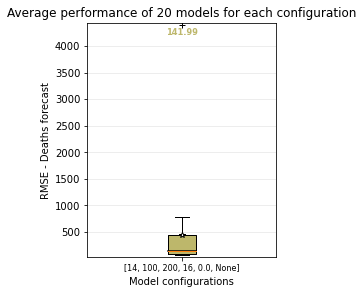

In [68]:
data = data__
data_input_label = 'aqi'

# guarda scores e configs
scores_grid = list()
# guarda os cinco melhores modelos pra plotar
models = list()

nn.grid_search(data, n_test, config, n_repeats, models, scores_grid)
print('done')
# list top 10 configs
for cfg, error in scores_grid[:1]:
  print(cfg, error)

# plot top configs
score_list, key_list = nn.boxplot_experiments_best(scores_grid, 5, n_repeats, data_input_label)

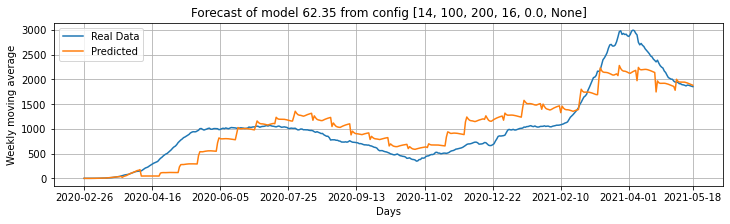

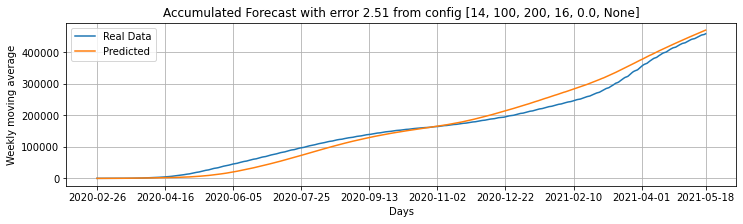

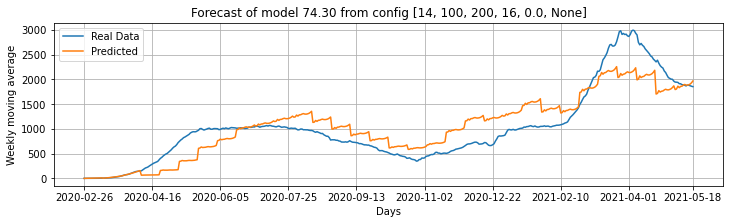

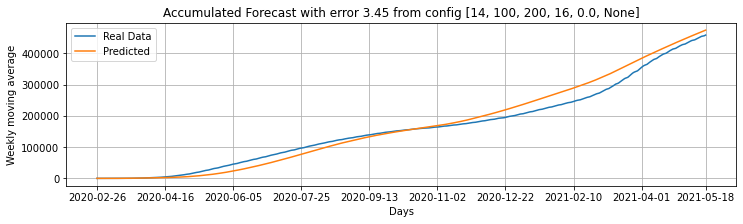

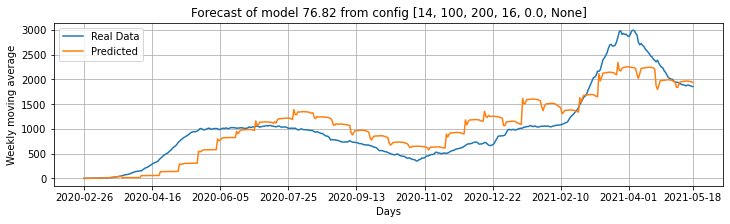

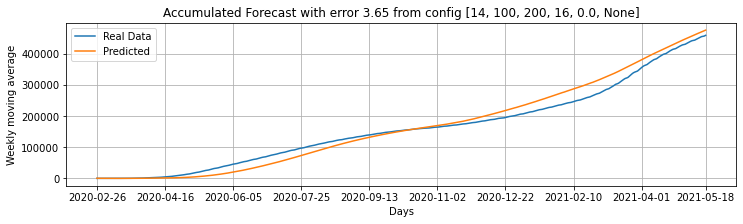

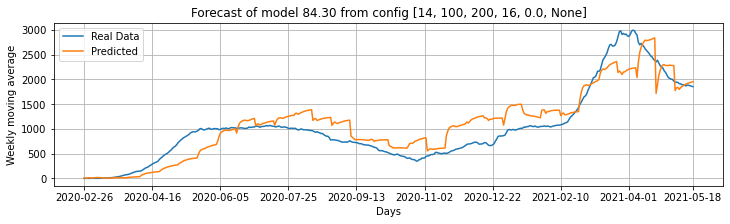

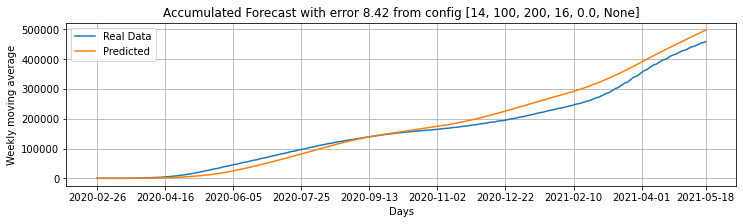

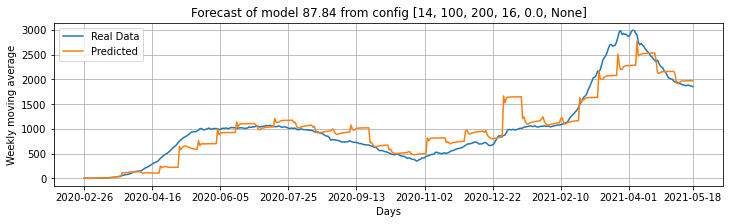

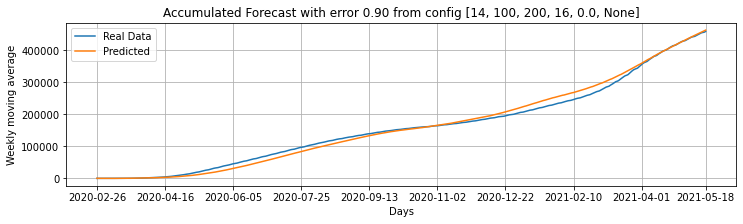

In [69]:
nn.plot_predictions(models, data, models, 5, n_test, df_parameters_seird['Date'].values, data_input_label)

[14, 50, 100, 16, 0.0, None] 364.20405509823746
[14, 50, 100, 16, 0.0, None] 111.12090033916887
[14, 50, 100, 16, 0.0, None] 291.45219644480295
[14, 50, 100, 16, 0.0, None] 245.53791395118597
[14, 50, 100, 16, 0.0, None] 266.8363115985154
[14, 50, 100, 16, 0.0, None] 763.3954987422967
[14, 50, 100, 16, 0.0, None] 306.6333315215422
[14, 50, 100, 16, 0.0, None] 93.01861057907982
[14, 50, 100, 16, 0.0, None] 834.6200482854458
[14, 50, 100, 16, 0.0, None] 93.75422907127977
[14, 50, 100, 16, 0.0, None] 190.6457673113935
[14, 50, 100, 16, 0.0, None] 259.59457573300716
[14, 50, 100, 16, 0.0, None] 198.9993522288452
[14, 50, 100, 16, 0.0, None] 366.9164158905949
[14, 50, 100, 16, 0.0, None] 78.7826972050732
[14, 50, 100, 16, 0.0, None] 328.6319892752378
[14, 50, 100, 16, 0.0, None] 194.276643121349
[14, 50, 100, 16, 0.0, None] 73.26649305041323
[14, 50, 100, 16, 0.0, None] 95.1633464102645
[14, 50, 100, 16, 0.0, None] 124.32910585418043
[14, 50, 100, 16, 0.0, None] 504.9996287127348
[14, 50, 1

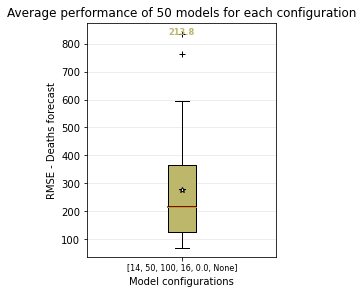

In [19]:
data = data0
data_input_label = 'deaths'

# guarda scores e configs
scores_grid = list()
# guarda os cinco melhores modelos pra plotar
models = list()

nn.grid_search(data, n_test, config, n_repeats, models, scores_grid)
print('done')
# list top 10 configs
for cfg, error in scores_grid[:1]:
  print(cfg, error)

# plot top configs
score_list, key_list = nn.boxplot_experiments_best(scores_grid, 5, n_repeats, data_input_label)

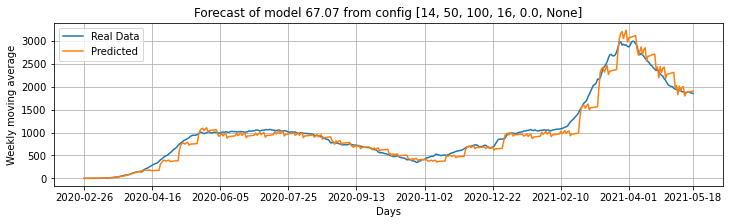

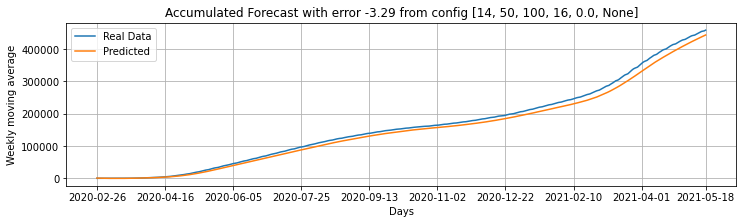

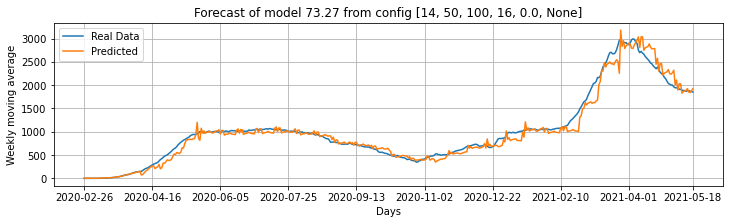

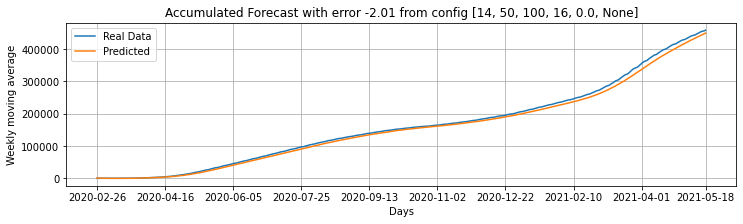

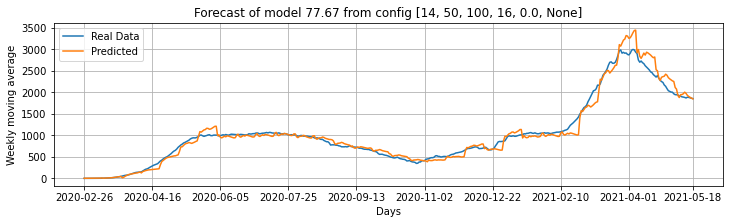

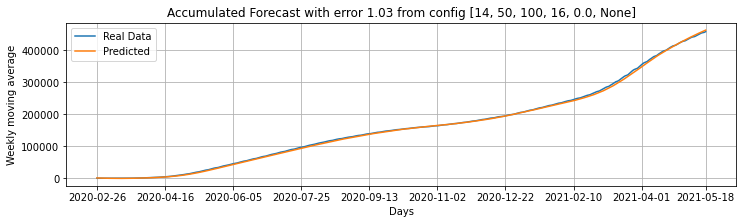

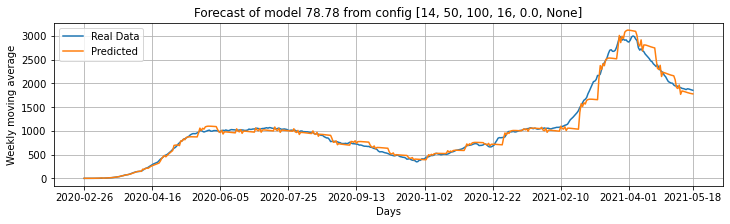

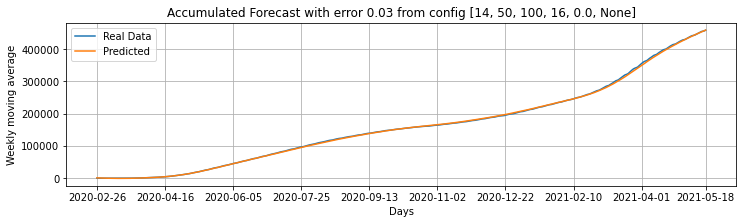

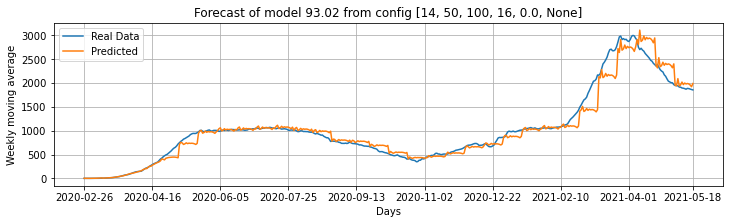

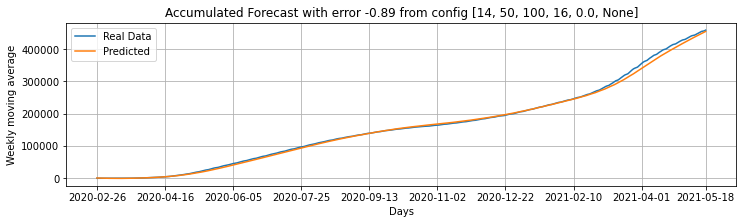

In [20]:
nn.plot_predictions(models, data, models, 5, n_test, df_parameters_seird['Date'].values, data_input_label)

[14, 100, 200, 16, 0.0, None] 199.82357452888286
[14, 100, 200, 16, 0.0, None] 254.97088528643815
[14, 100, 200, 16, 0.0, None] 431.82259088658157
[14, 100, 200, 16, 0.0, None] 281.879656280832
[14, 100, 200, 16, 0.0, None] 304.8855574227812
[14, 100, 200, 16, 0.0, None] 217.323491597204
[14, 100, 200, 16, 0.0, None] 352.1952805263012
[14, 100, 200, 16, 0.0, None] 346.53663677164064
[14, 100, 200, 16, 0.0, None] 691.5112074290626
[14, 100, 200, 16, 0.0, None] 85.86199239641047
[14, 100, 200, 16, 0.0, None] 129.82101560899144
[14, 100, 200, 16, 0.0, None] 301.957222239343
[14, 100, 200, 16, 0.0, None] 137.45863014012616
[14, 100, 200, 16, 0.0, None] 151.4244990292192
[14, 100, 200, 16, 0.0, None] 54.11059998974323
[14, 100, 200, 16, 0.0, None] 318.6294625030774
[14, 100, 200, 16, 0.0, None] 110.47022187845465
[14, 100, 200, 16, 0.0, None] 99.96858881668781
[14, 100, 200, 16, 0.0, None] 112.03868524838865
[14, 100, 200, 16, 0.0, None] 1866.890462774932
done
[14, 100, 200, 16, 0.0, None] 

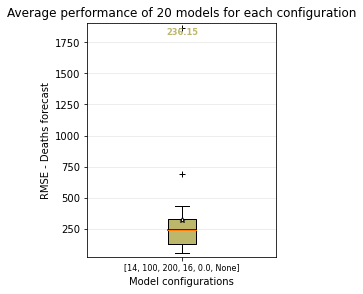

In [71]:
data = data1
data_input_label = 'cases'

# guarda scores e configs
scores_grid = list()
# guarda os cinco melhores modelos pra plotar
models = list()

nn.grid_search(data, n_test, config, n_repeats, models, scores_grid)
print('done')
# list top 10 configs
for cfg, error in scores_grid[:1]:
  print(cfg, error)

# plot top configs
score_list, key_list = nn.boxplot_experiments_best(scores_grid, 5, n_repeats, data_input_label)

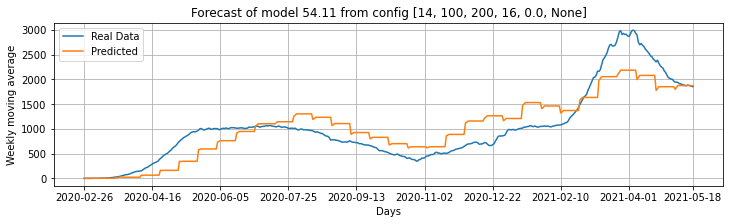

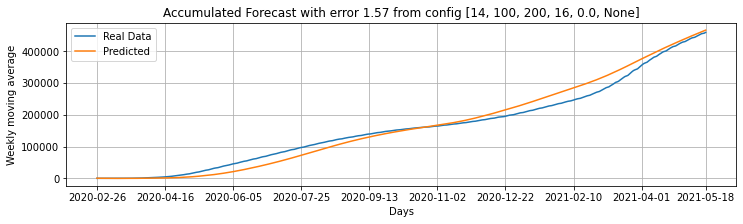

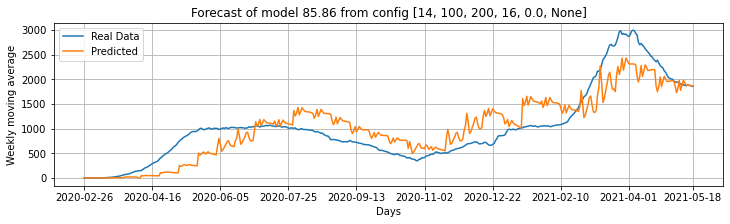

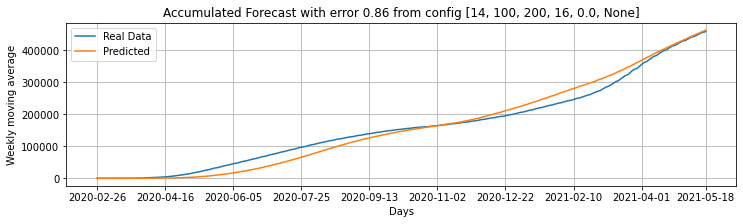

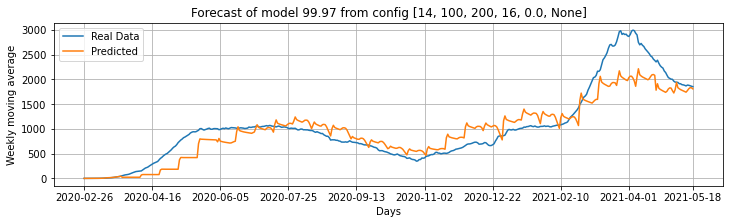

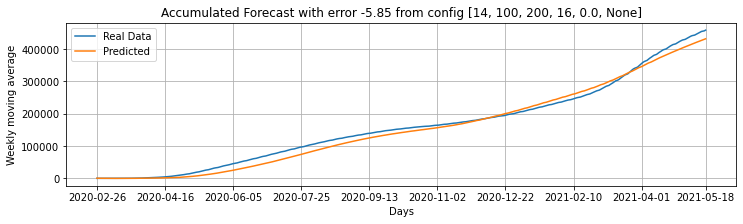

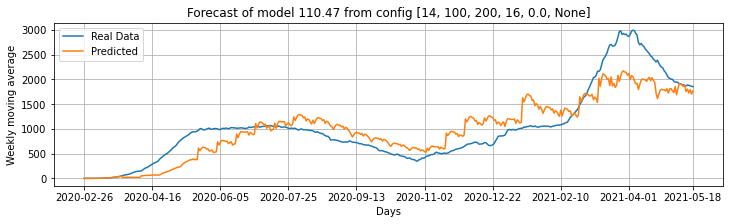

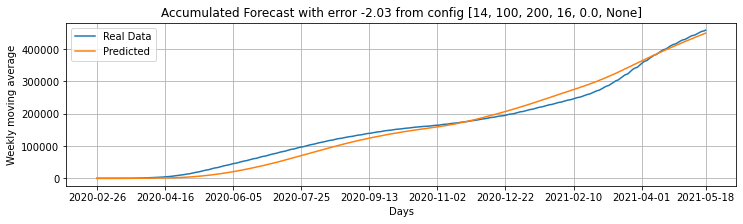

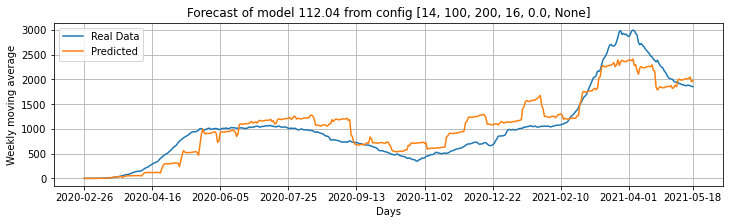

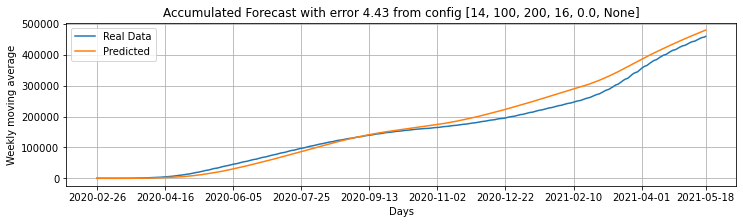

In [72]:
nn.plot_predictions(models, data, models, 5, n_test, df_parameters_seird['Date'].values, data_input_label)

[14, 50, 100, 16, 0.0, None] 158.95121966935326
[14, 50, 100, 16, 0.0, None] 88.85542264157264
[14, 50, 100, 16, 0.0, None] 80.2190786904057
[14, 50, 100, 16, 0.0, None] 123.25796674936473
[14, 50, 100, 16, 0.0, None] 218.3525854266443
[14, 50, 100, 16, 0.0, None] 145.6821776162067
[14, 50, 100, 16, 0.0, None] 186.3021005148627
[14, 50, 100, 16, 0.0, None] 334.1874123340076
[14, 50, 100, 16, 0.0, None] 173.6046660609242
[14, 50, 100, 16, 0.0, None] 216.6463762534467
[14, 50, 100, 16, 0.0, None] 475.4421297592379
[14, 50, 100, 16, 0.0, None] 167.4333472795966
[14, 50, 100, 16, 0.0, None] 101.17656963046089
[14, 50, 100, 16, 0.0, None] 335.17361406068346
[14, 50, 100, 16, 0.0, None] 356.5202374164754
[14, 50, 100, 16, 0.0, None] 321.7994571546074
[14, 50, 100, 16, 0.0, None] 284.47520212665285
[14, 50, 100, 16, 0.0, None] 265.713985094876
[14, 50, 100, 16, 0.0, None] 206.52348345587723
[14, 50, 100, 16, 0.0, None] 100.55602255397237
[14, 50, 100, 16, 0.0, None] 88.10779142707102
[14, 50,

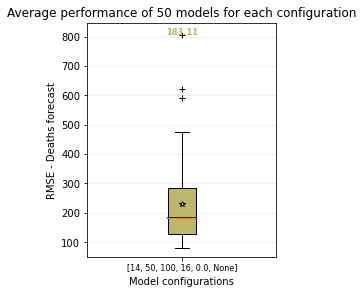

In [23]:
data = data2
data_input_label = 'cases_holiday'

# guarda scores e configs
scores_grid = list()
# guarda os cinco melhores modelos pra plotar
models = list()

nn.grid_search(data, n_test, config, n_repeats, models, scores_grid)
print('done')
# list top 10 configs
for cfg, error in scores_grid[:1]:
  print(cfg, error)

# plot top configs
score_list, key_list = nn.boxplot_experiments_best(scores_grid, 5, n_repeats, data_input_label)

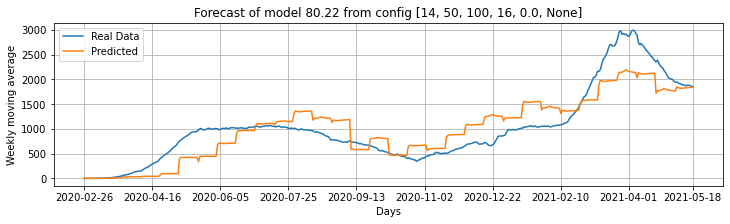

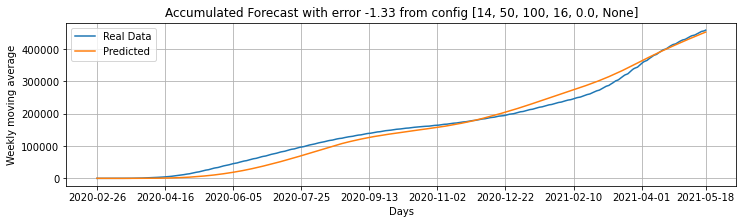

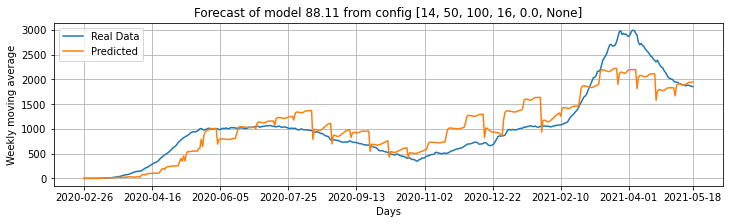

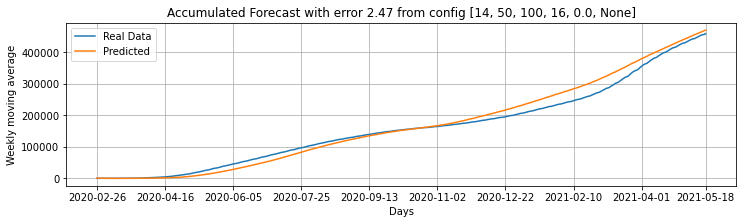

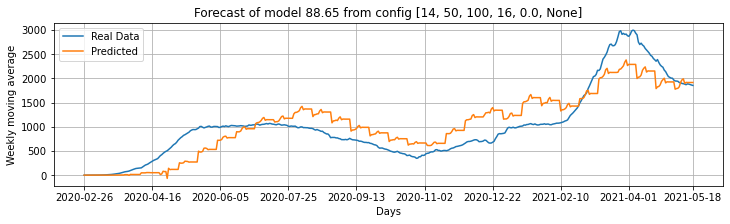

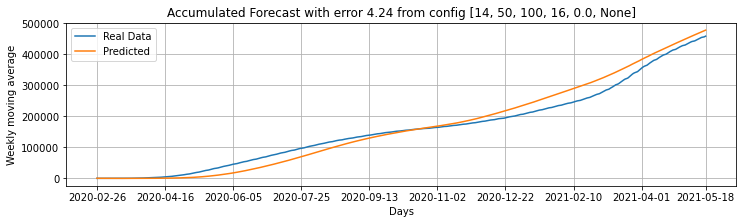

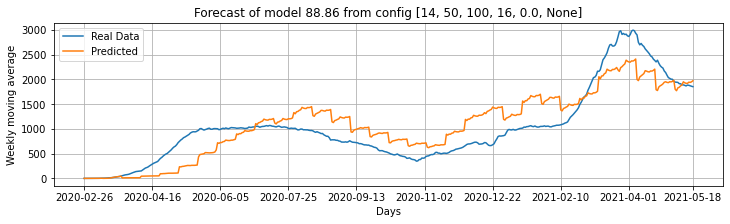

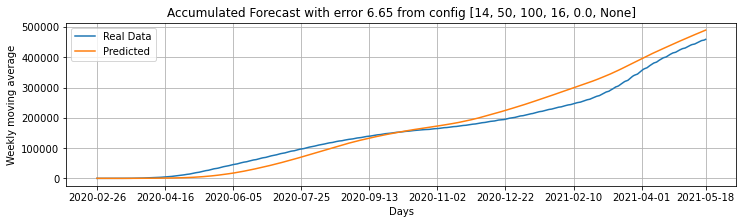

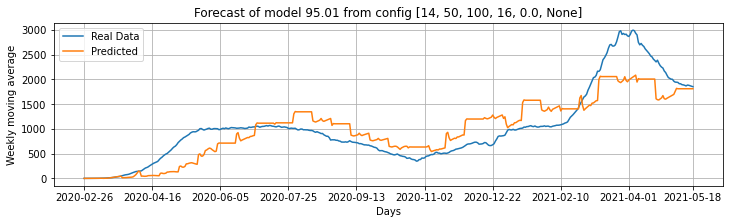

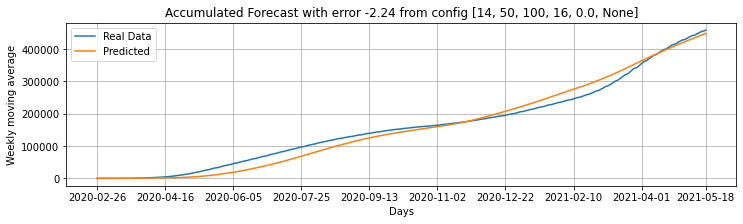

In [24]:
nn.plot_predictions(models, data, models, 5, n_test, df_parameters_seird['Date'].values, data_input_label)

[14, 50, 100, 16, 0.0, None] 208.72309894031852
[14, 50, 100, 16, 0.0, None] 173.37130493539004
[14, 50, 100, 16, 0.0, None] 199.5593485501243
[14, 50, 100, 16, 0.0, None] 266.8090375155984
[14, 50, 100, 16, 0.0, None] 1007.3231544544184
[14, 50, 100, 16, 0.0, None] 68.12877713152864
[14, 50, 100, 16, 0.0, None] 62.85261467811025
[14, 50, 100, 16, 0.0, None] 118.28640593121848
[14, 50, 100, 16, 0.0, None] 133.60975415833232
[14, 50, 100, 16, 0.0, None] 371.1939562075331
[14, 50, 100, 16, 0.0, None] 182.42846414759404
[14, 50, 100, 16, 0.0, None] 126.84891588396607
[14, 50, 100, 16, 0.0, None] 148.1263383378358
[14, 50, 100, 16, 0.0, None] 167.08708433029764
[14, 50, 100, 16, 0.0, None] 184.54834012732275
[14, 50, 100, 16, 0.0, None] 117.66660810978831
[14, 50, 100, 16, 0.0, None] 179.08200700900971
[14, 50, 100, 16, 0.0, None] 118.94483194689461
[14, 50, 100, 16, 0.0, None] 188.72291817304543
[14, 50, 100, 16, 0.0, None] 169.0513455192682
[14, 50, 100, 16, 0.0, None] 170.1672373633509


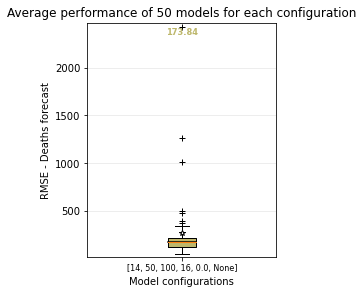

In [25]:
data = data3
data_input_label = 'cases_r0'

# guarda scores e configs
scores_grid = list()
# guarda os cinco melhores modelos pra plotar
models = list()

nn.grid_search(data, n_test, config, n_repeats, models, scores_grid)
print('done')
# list top 10 configs
for cfg, error in scores_grid[:1]:
  print(cfg, error)

# plot top configs
score_list, key_list = nn.boxplot_experiments_best(scores_grid, 5, n_repeats, data_input_label)

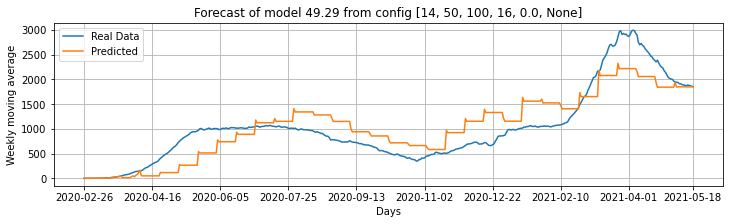

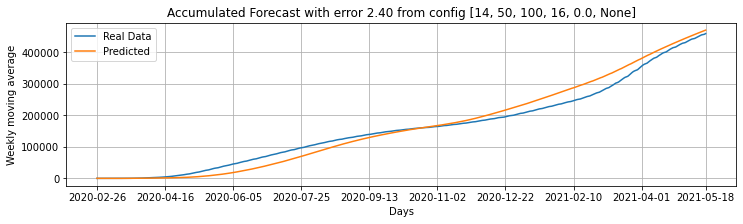

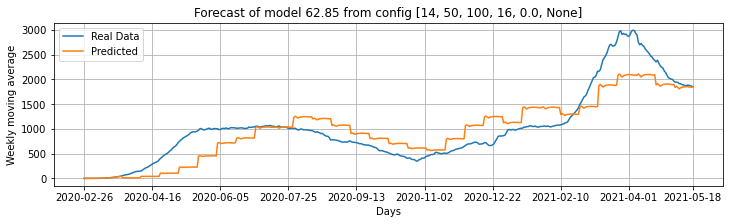

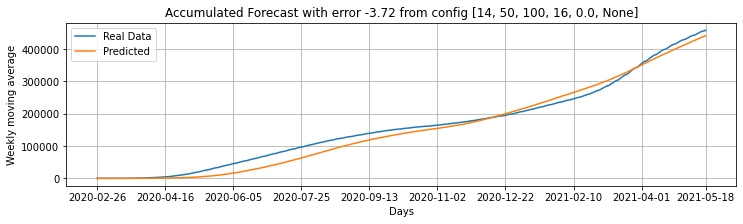

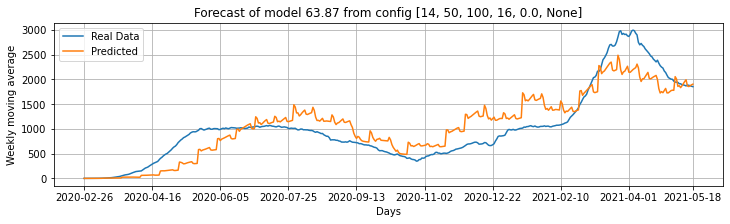

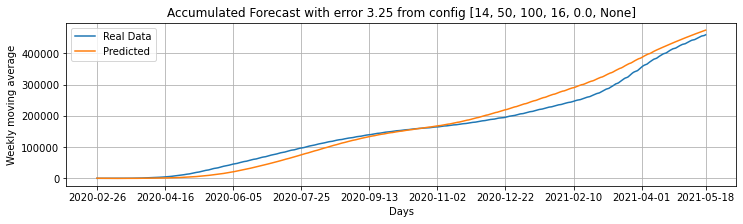

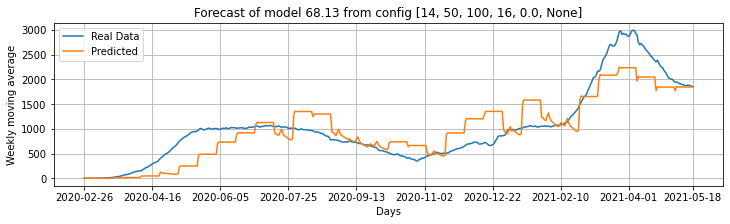

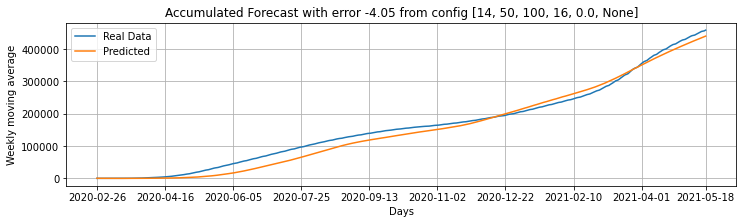

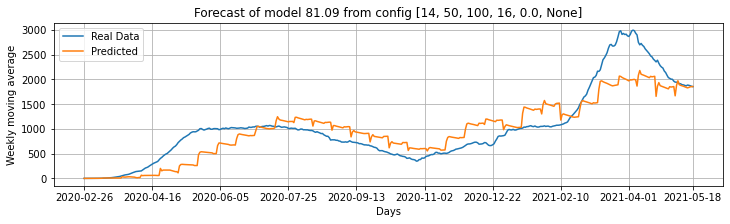

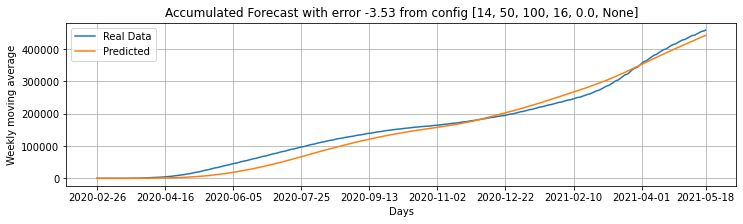

In [26]:
nn.plot_predictions(models, data, models, 5, n_test, df_parameters_seird['Date'].values, data_input_label)

[14, 50, 100, 16, 0.0, None] 381.85042883307074
[14, 50, 100, 16, 0.0, None] 437.867185200033
[14, 50, 100, 16, 0.0, None] 1070.317651447457
[14, 50, 100, 16, 0.0, None] 369.72225639660917
[14, 50, 100, 16, 0.0, None] 282.14088070058193
[14, 50, 100, 16, 0.0, None] 406.1730311702145
[14, 50, 100, 16, 0.0, None] 205.95442836341246
[14, 50, 100, 16, 0.0, None] 529.2175828522707
[14, 50, 100, 16, 0.0, None] 154.53326275231169
[14, 50, 100, 16, 0.0, None] 284.60737758357567
[14, 50, 100, 16, 0.0, None] 242.1551429997926
[14, 50, 100, 16, 0.0, None] 117.48140644108327
[14, 50, 100, 16, 0.0, None] 101.49156176439004
[14, 50, 100, 16, 0.0, None] 284.747023140717
[14, 50, 100, 16, 0.0, None] 404.65724307739754
[14, 50, 100, 16, 0.0, None] 818.4504413829832
[14, 50, 100, 16, 0.0, None] 156.22444791069034
[14, 50, 100, 16, 0.0, None] 163.5182102339828
[14, 50, 100, 16, 0.0, None] 317.4771768371705
[14, 50, 100, 16, 0.0, None] 106.02995136251596
[14, 50, 100, 16, 0.0, None] 218.64571621403883
[14

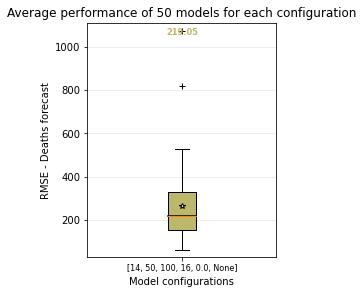

In [27]:
data = data4
data_input_label = 'r0'

# guarda scores e configs
scores_grid = list()
# guarda os cinco melhores modelos pra plotar
models = list()

nn.grid_search(data, n_test, config, n_repeats, models, scores_grid)
print('done')
# list top 10 configs
for cfg, error in scores_grid[:1]:
  print(cfg, error)

# plot top configs
score_list, key_list = nn.boxplot_experiments_best(scores_grid, 5, n_repeats, data_input_label)

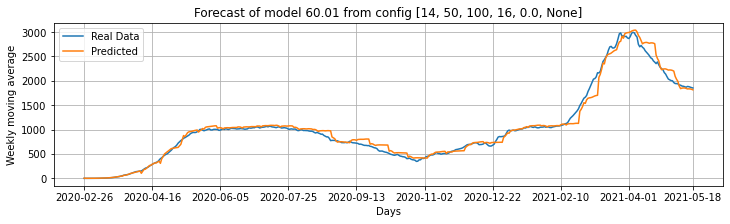

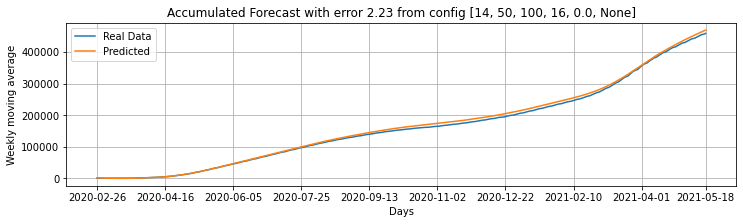

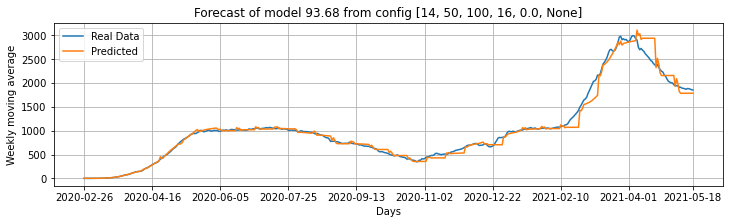

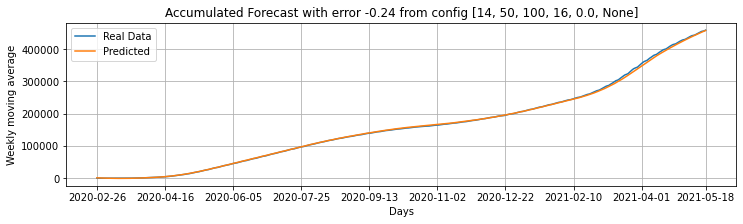

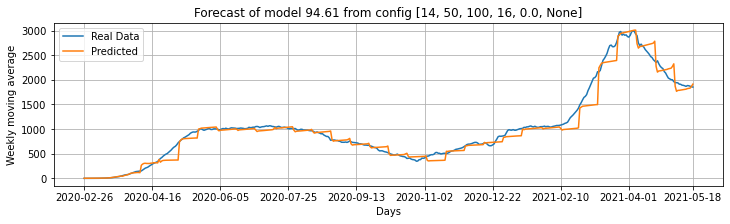

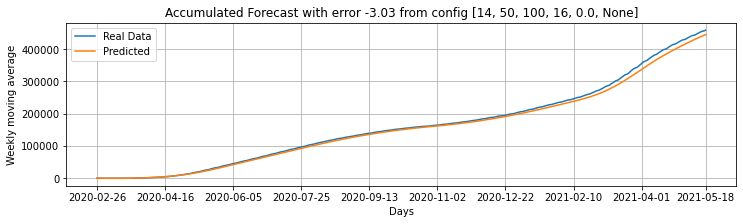

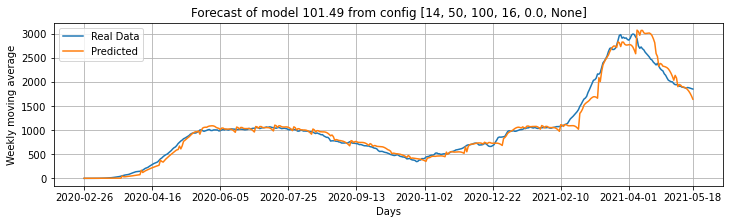

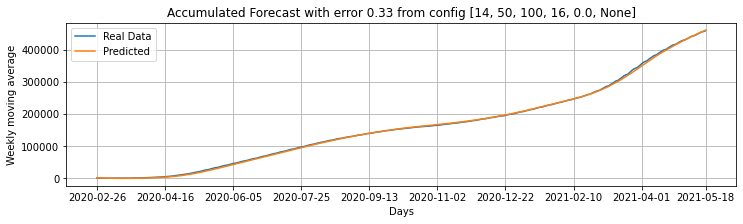

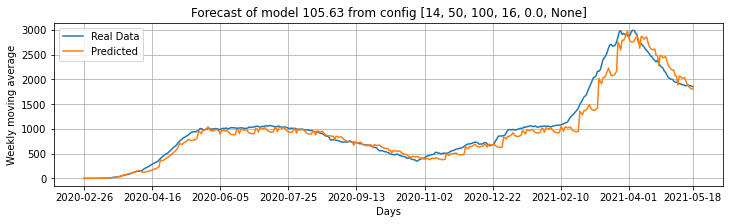

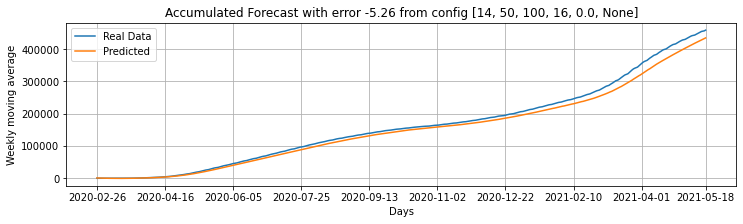

In [28]:
nn.plot_predictions(models, data, models, 5, n_test, df_parameters_seird['Date'].values, data_input_label)

[14, 50, 100, 16, 0.0, None] 112.75788584534786
[14, 50, 100, 16, 0.0, None] 166.55262048561409
[14, 50, 100, 16, 0.0, None] 215.15180868691297
[14, 50, 100, 16, 0.0, None] 518.635650047314
[14, 50, 100, 16, 0.0, None] 199.70847894493613
[14, 50, 100, 16, 0.0, None] 147.4799443462568
[14, 50, 100, 16, 0.0, None] 412.49755681094643
[14, 50, 100, 16, 0.0, None] 441.6956319118404
[14, 50, 100, 16, 0.0, None] 286.12697956938626
[14, 50, 100, 16, 0.0, None] 513.320988758496
[14, 50, 100, 16, 0.0, None] 179.5114518021761
[14, 50, 100, 16, 0.0, None] 118.73452612998672
[14, 50, 100, 16, 0.0, None] 175.38817996625372
[14, 50, 100, 16, 0.0, None] 364.9830903617317
[14, 50, 100, 16, 0.0, None] 112.45242049418056
[14, 50, 100, 16, 0.0, None] 289.71412364173756
[14, 50, 100, 16, 0.0, None] 300.93945352429284
[14, 50, 100, 16, 0.0, None] 389.05902106878335
[14, 50, 100, 16, 0.0, None] 155.7307747966021
[14, 50, 100, 16, 0.0, None] 270.2665784692958
[14, 50, 100, 16, 0.0, None] 143.2582690130835
[14

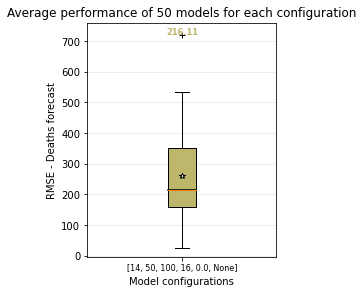

In [29]:
data = data5
data_input_label = 'r0_holiday'

# guarda scores e configs
scores_grid = list()
# guarda os cinco melhores modelos pra plotar
models = list()

nn.grid_search(data, n_test, config, n_repeats, models, scores_grid)
print('done')
# list top 10 configs
for cfg, error in scores_grid[:1]:
  print(cfg, error)

# plot top configs
score_list, key_list = nn.boxplot_experiments_best(scores_grid, 5, n_repeats, data_input_label)

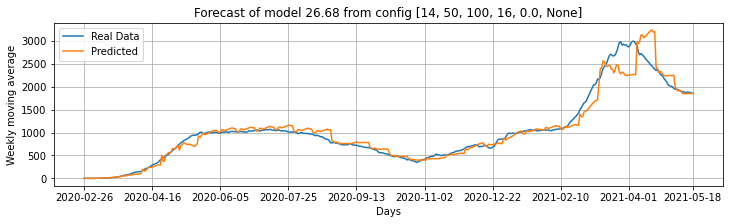

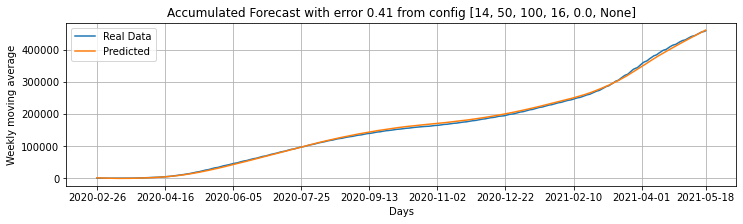

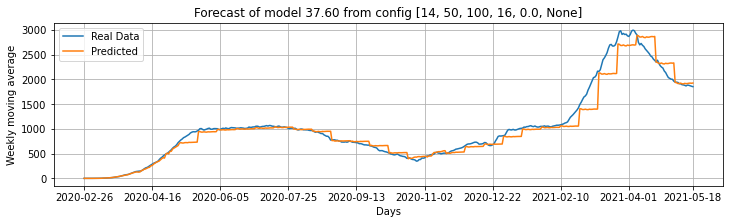

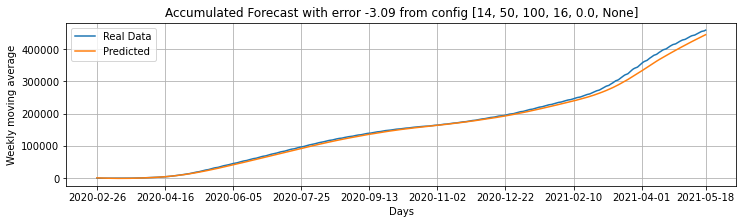

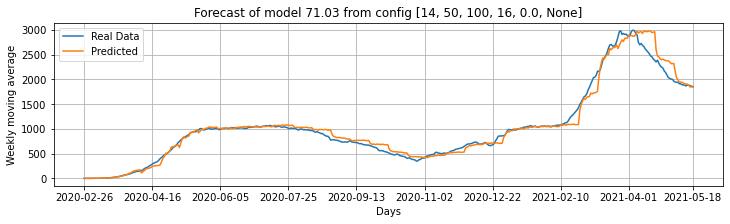

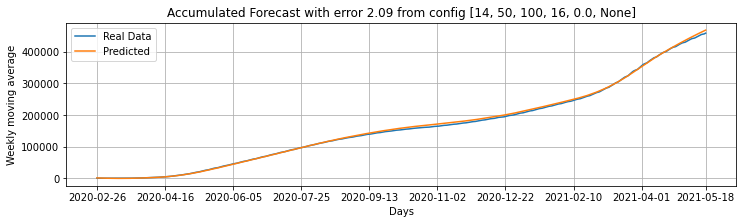

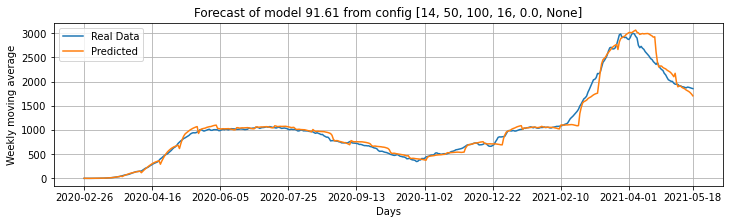

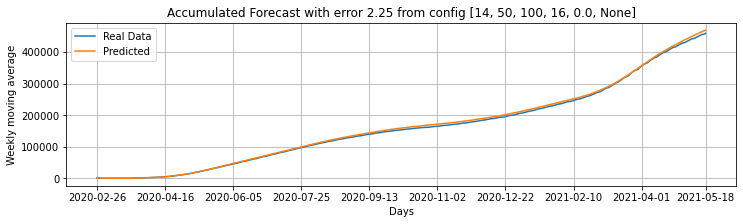

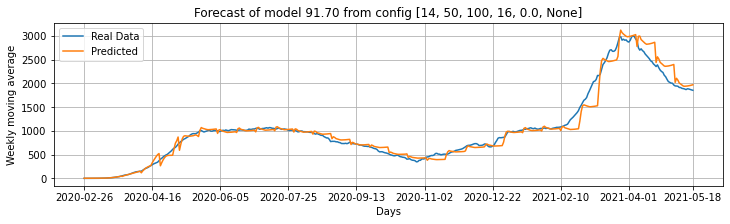

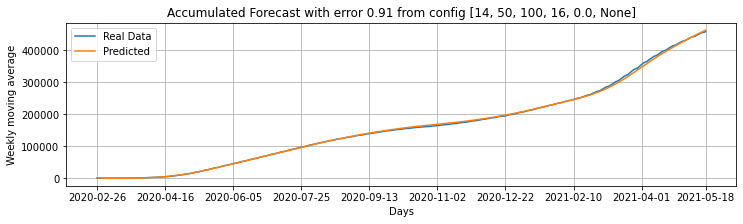

In [30]:
nn.plot_predictions(models, data, models, 5, n_test, df_parameters_seird['Date'].values, data_input_label)

[14, 50, 100, 16, 0.0, None] 54.67604790805339
[14, 50, 100, 16, 0.0, None] 181.09615237837053
[14, 50, 100, 16, 0.0, None] 157.11500564872853
[14, 50, 100, 16, 0.0, None] 182.71762495377942
[14, 50, 100, 16, 0.0, None] 184.9002475998883
[14, 50, 100, 16, 0.0, None] 178.10640802094966
[14, 50, 100, 16, 0.0, None] 192.94454554677102
[14, 50, 100, 16, 0.0, None] 212.4546183158888
[14, 50, 100, 16, 0.0, None] 368.688533012623
[14, 50, 100, 16, 0.0, None] 241.95488829273526
[14, 50, 100, 16, 0.0, None] 145.56703513759564
[14, 50, 100, 16, 0.0, None] 488.1251920614219
[14, 50, 100, 16, 0.0, None] 121.97702060096196
[14, 50, 100, 16, 0.0, None] 216.52772989273222
[14, 50, 100, 16, 0.0, None] 184.61643091149824
[14, 50, 100, 16, 0.0, None] 203.41805782673276
[14, 50, 100, 16, 0.0, None] 248.87453697847437
[14, 50, 100, 16, 0.0, None] 445.1098354619902
[14, 50, 100, 16, 0.0, None] 302.811293857247
[14, 50, 100, 16, 0.0, None] 565.0822672407975
[14, 50, 100, 16, 0.0, None] 233.43650434861297
[1

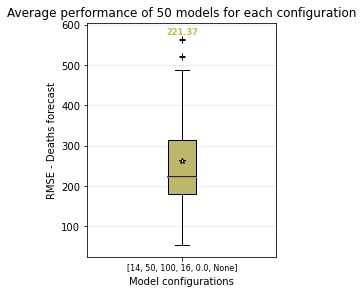

In [31]:
data = data6
data_input_label = 'rt'

# guarda scores e configs
scores_grid = list()
# guarda os cinco melhores modelos pra plotar
models = list()

nn.grid_search(data, n_test, config, n_repeats, models, scores_grid)
print('done')
# list top 10 configs
for cfg, error in scores_grid[:1]:
  print(cfg, error)

# plot top configs
score_list, key_list = nn.boxplot_experiments_best(scores_grid, 5, n_repeats, data_input_label)

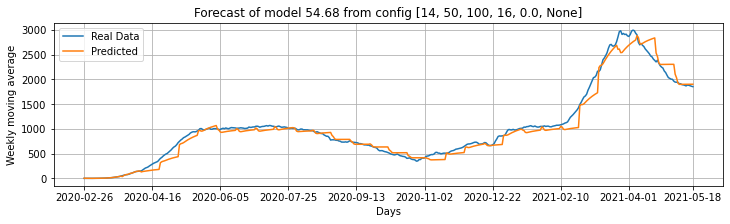

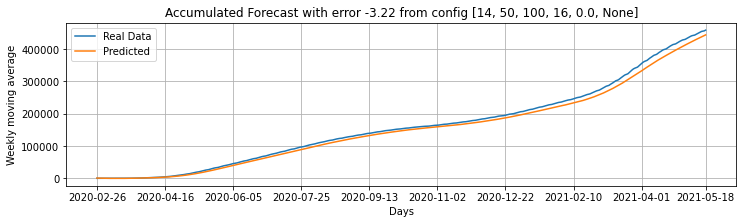

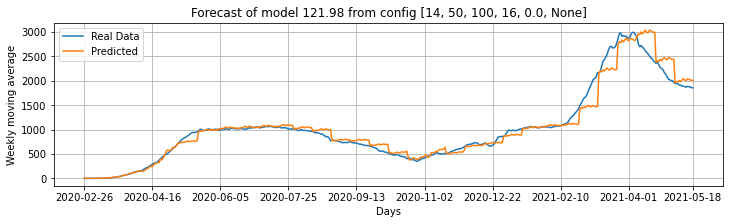

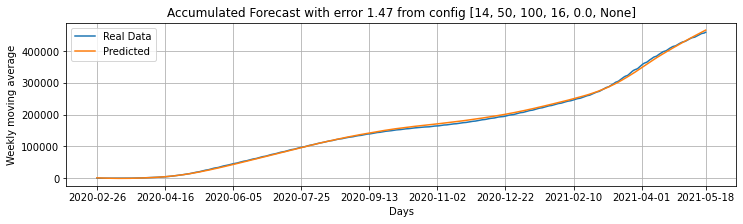

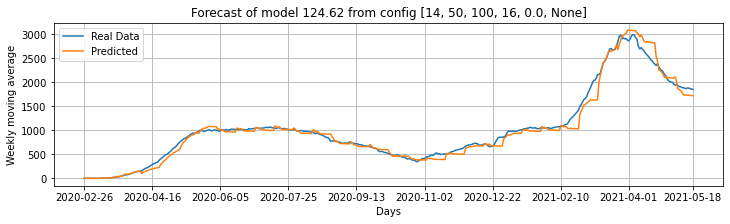

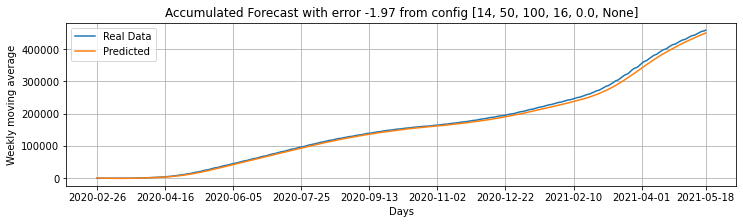

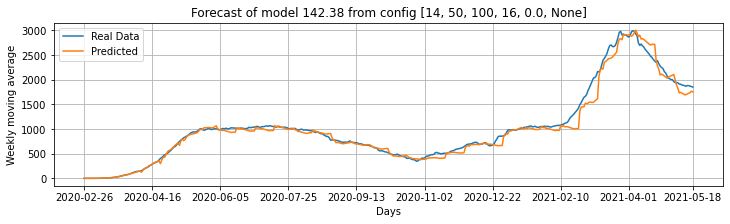

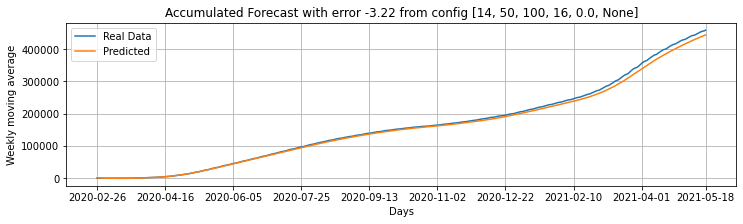

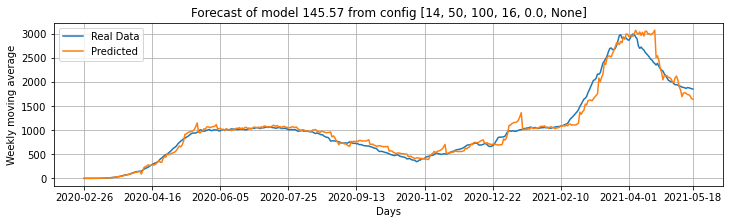

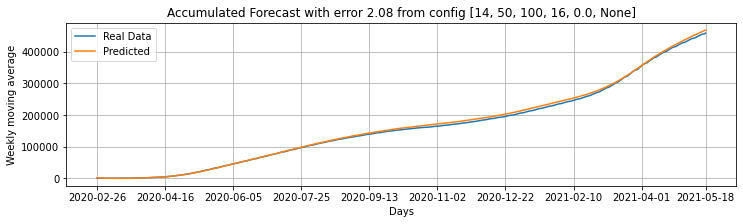

In [32]:
nn.plot_predictions(models, data, models, 5, n_test, df_parameters_seird['Date'].values, data_input_label)

[14, 50, 100, 16, 0.0, None] 130.40589429019303
[14, 50, 100, 16, 0.0, None] 71.16242562133826
[14, 50, 100, 16, 0.0, None] 327.31570434749995
[14, 50, 100, 16, 0.0, None] 68.38191592651708
[14, 50, 100, 16, 0.0, None] 212.22273271553638
[14, 50, 100, 16, 0.0, None] 150.31193477024703
[14, 50, 100, 16, 0.0, None] 152.5960058966977
[14, 50, 100, 16, 0.0, None] 371.68759984024217
[14, 50, 100, 16, 0.0, None] 236.93153184253464
[14, 50, 100, 16, 0.0, None] 249.56432349696942
[14, 50, 100, 16, 0.0, None] 207.6349993829316
[14, 50, 100, 16, 0.0, None] 346.90335469695304
[14, 50, 100, 16, 0.0, None] 317.71158058449805
[14, 50, 100, 16, 0.0, None] 135.7900349574666
[14, 50, 100, 16, 0.0, None] 226.1289213313945
[14, 50, 100, 16, 0.0, None] 362.1954323980356
[14, 50, 100, 16, 0.0, None] 128.79447047524982
[14, 50, 100, 16, 0.0, None] 86.64931905207045
[14, 50, 100, 16, 0.0, None] 183.22235040381946
[14, 50, 100, 16, 0.0, None] 98.0510021541723
[14, 50, 100, 16, 0.0, None] 264.8059873520612
[14

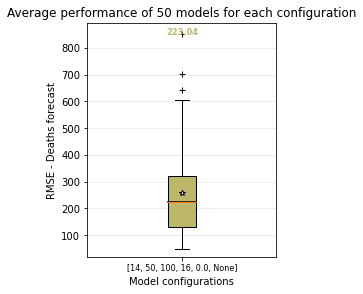

In [33]:
data = data7
data_input_label = 'rt_holiday'

# guarda scores e configs
scores_grid = list()
# guarda os cinco melhores modelos pra plotar
models = list()

nn.grid_search(data, n_test, config, n_repeats, models, scores_grid)
print('done')
# list top 10 configs
for cfg, error in scores_grid[:1]:
  print(cfg, error)

# plot top configs
score_list, key_list = nn.boxplot_experiments_best(scores_grid, 5, n_repeats, data_input_label)

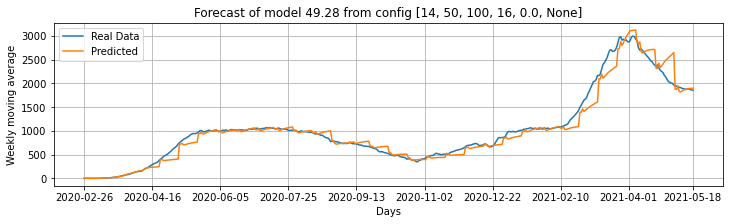

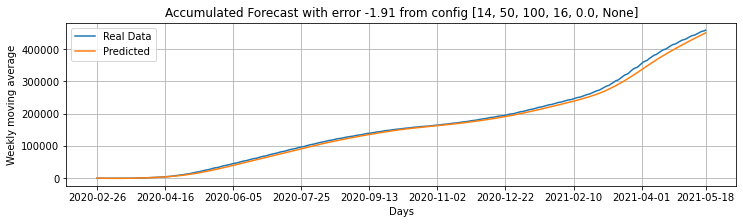

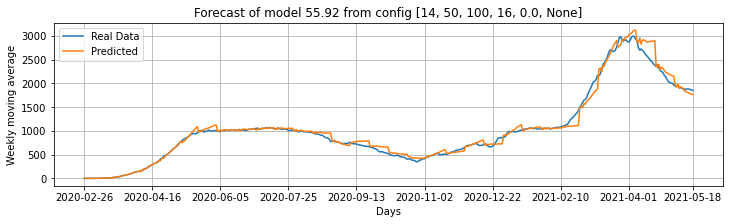

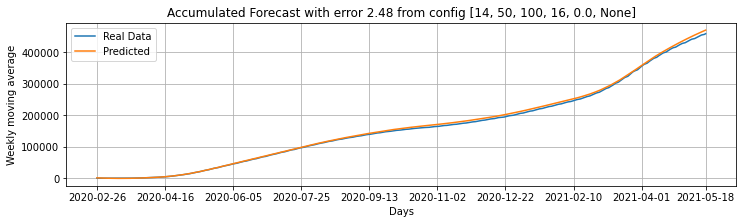

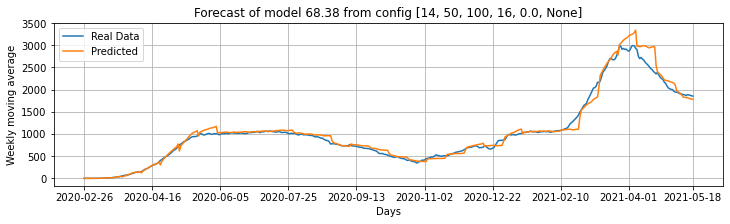

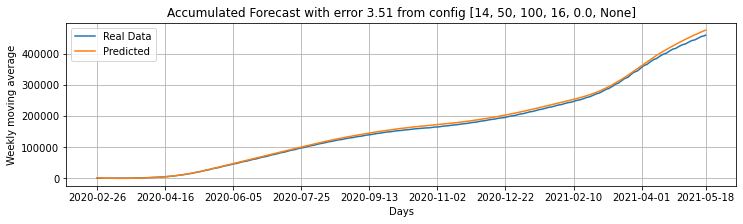

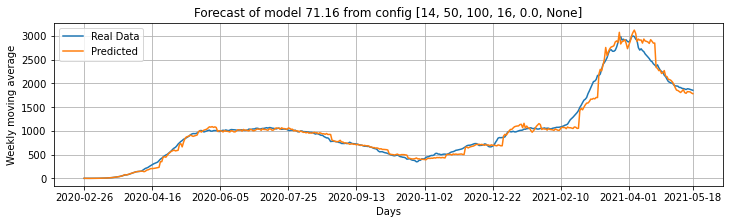

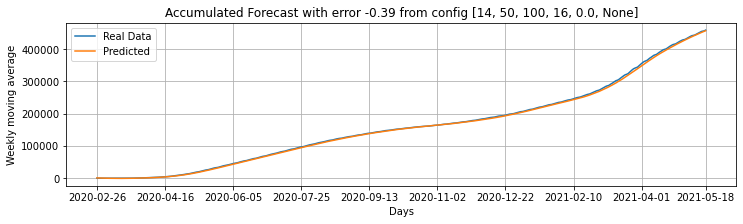

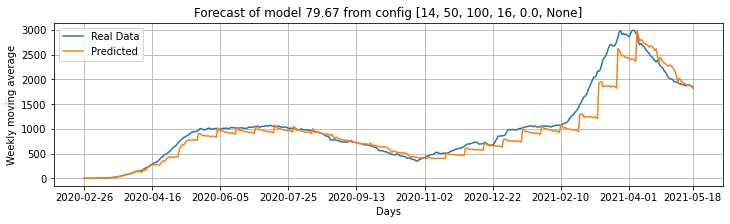

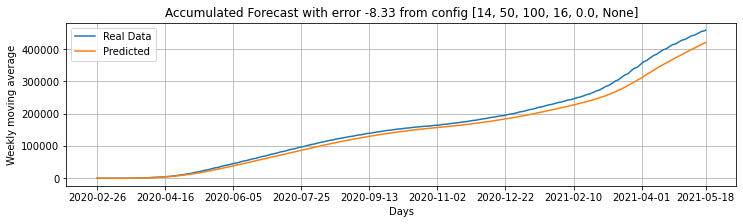

In [34]:
nn.plot_predictions(models, data, models, 5, n_test, df_parameters_seird['Date'].values, data_input_label)

[14, 50, 100, 16, 0.0, None] 62.23708568035922
[14, 50, 100, 16, 0.0, None] 73.71819692988801
[14, 50, 100, 16, 0.0, None] 5236.307477602896
[14, 50, 100, 16, 0.0, None] 131.99545742657207
[14, 50, 100, 16, 0.0, None] 155.60350629685374
[14, 50, 100, 16, 0.0, None] 230.6704308233936
[14, 50, 100, 16, 0.0, None] 380.84365640640516
[14, 50, 100, 16, 0.0, None] 185.36764567340225
[14, 50, 100, 16, 0.0, None] 92.66050791228429
[14, 50, 100, 16, 0.0, None] 195.39757147288194
[14, 50, 100, 16, 0.0, None] 151.67904024617243
[14, 50, 100, 16, 0.0, None] 126.61428724427192
[14, 50, 100, 16, 0.0, None] 144.61080580734622
[14, 50, 100, 16, 0.0, None] 61.63848816004697
[14, 50, 100, 16, 0.0, None] 493.96209052416157
[14, 50, 100, 16, 0.0, None] 139.43464250769964
[14, 50, 100, 16, 0.0, None] 433.84372186306905
[14, 50, 100, 16, 0.0, None] 243.58572990325192
[14, 50, 100, 16, 0.0, None] 317.2750925852832
[14, 50, 100, 16, 0.0, None] 144.84788626780164
[14, 50, 100, 16, 0.0, None] 457.92202188254714

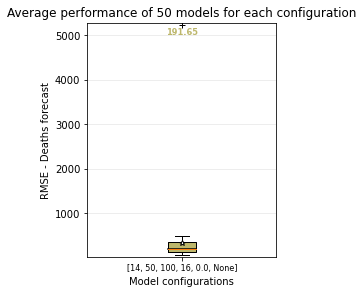

In [35]:
data = data8
data_input_label = 'r0_rt'

# guarda scores e configs
scores_grid = list()
# guarda os cinco melhores modelos pra plotar
models = list()

nn.grid_search(data, n_test, config, n_repeats, models, scores_grid)
print('done')
# list top 10 configs
for cfg, error in scores_grid[:1]:
  print(cfg, error)

# plot top configs
score_list, key_list = nn.boxplot_experiments_best(scores_grid, 5, n_repeats, data_input_label)

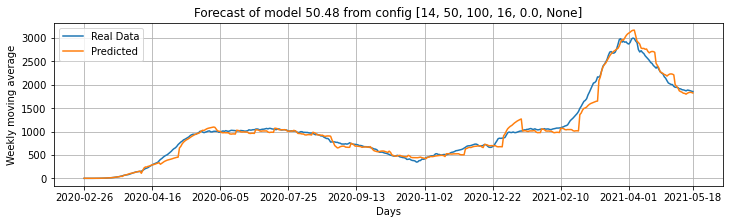

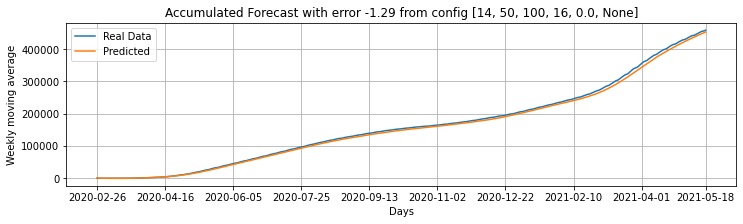

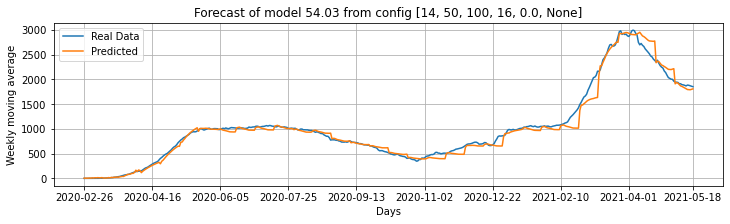

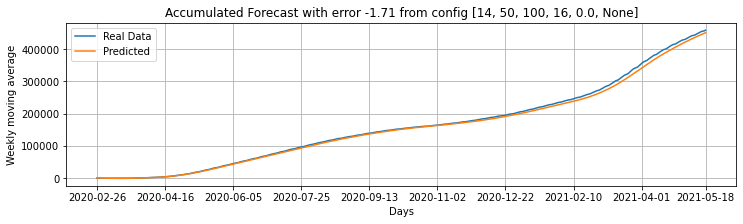

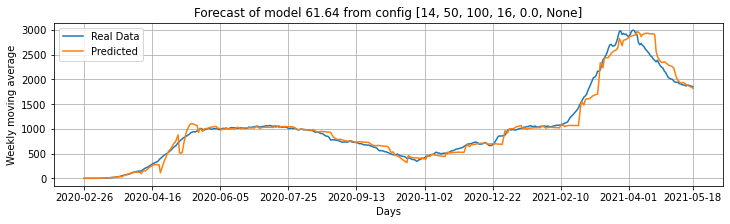

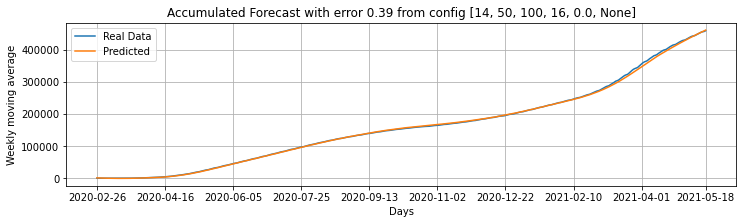

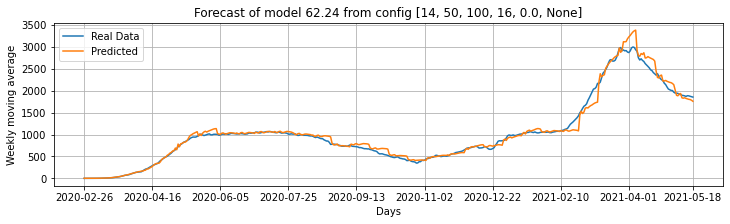

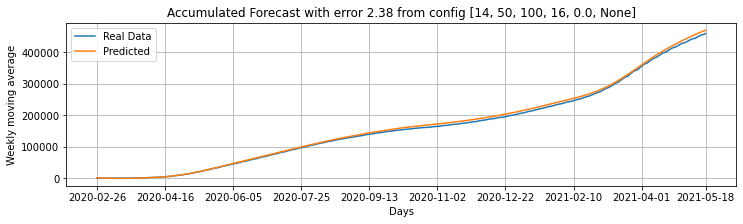

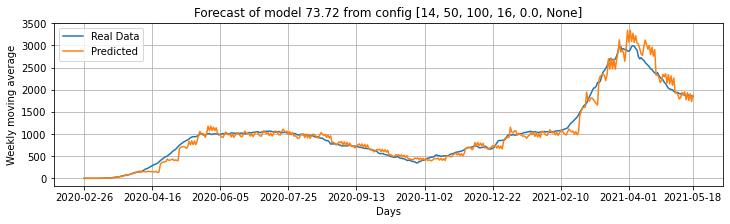

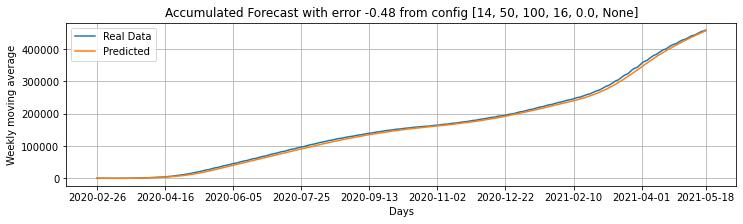

In [36]:
nn.plot_predictions(models, data, models, 5, n_test, df_parameters_seird['Date'].values, data_input_label)

[14, 50, 100, 16, 0.0, None] 220.06682223815565
[14, 50, 100, 16, 0.0, None] 395.4171649979298
[14, 50, 100, 16, 0.0, None] 423.91281901471206
[14, 50, 100, 16, 0.0, None] 280.670875982885
[14, 50, 100, 16, 0.0, None] 177.98389147616703
[14, 50, 100, 16, 0.0, None] 108.10738205454565
[14, 50, 100, 16, 0.0, None] 126.58861998986126
[14, 50, 100, 16, 0.0, None] 284.5696037439698
[14, 50, 100, 16, 0.0, None] 319.7078500365607
[14, 50, 100, 16, 0.0, None] 176.17235102485577
[14, 50, 100, 16, 0.0, None] 217.0959069455249
[14, 50, 100, 16, 0.0, None] 213.72083134313323
[14, 50, 100, 16, 0.0, None] 414.1182839781407
[14, 50, 100, 16, 0.0, None] 324.0436891840358
[14, 50, 100, 16, 0.0, None] 390.1473880150936
[14, 50, 100, 16, 0.0, None] 121.40824885741907
[14, 50, 100, 16, 0.0, None] 283.5457276833844
[14, 50, 100, 16, 0.0, None] 161.81167318251485
[14, 50, 100, 16, 0.0, None] 102.60118386104276
[14, 50, 100, 16, 0.0, None] 544.9230450256256
[14, 50, 100, 16, 0.0, None] 130.7252530954712
[14,

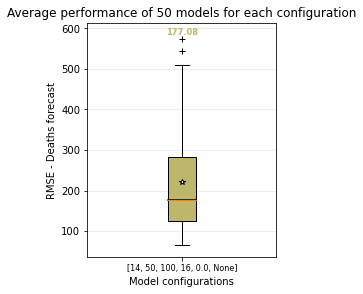

In [37]:
data = data9
data_input_label = 'r0_rt_holiday'

# guarda scores e configs
scores_grid = list()
# guarda os cinco melhores modelos pra plotar
models = list()

nn.grid_search(data, n_test, config, n_repeats, models, scores_grid)
print('done')
# list top 10 configs
for cfg, error in scores_grid[:1]:
  print(cfg, error)

# plot top configs
score_list, key_list = nn.boxplot_experiments_best(scores_grid, 5, n_repeats, data_input_label)

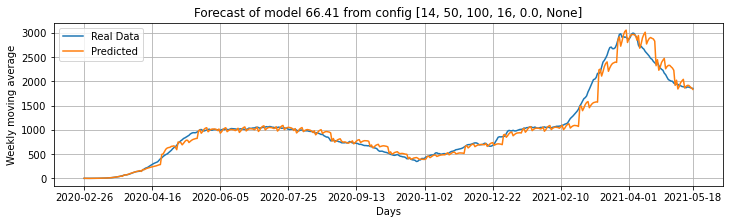

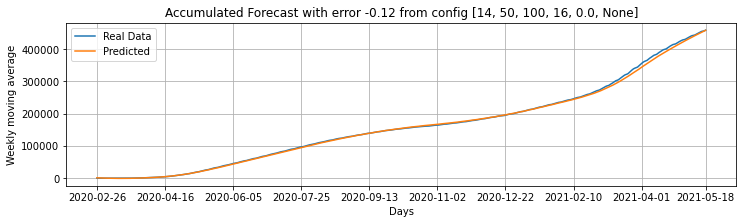

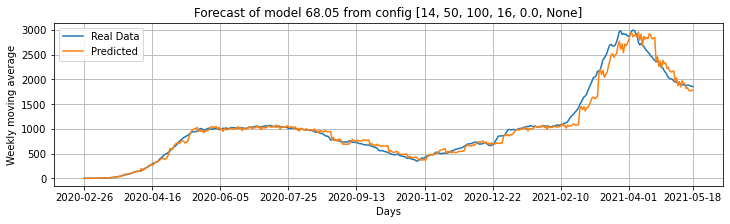

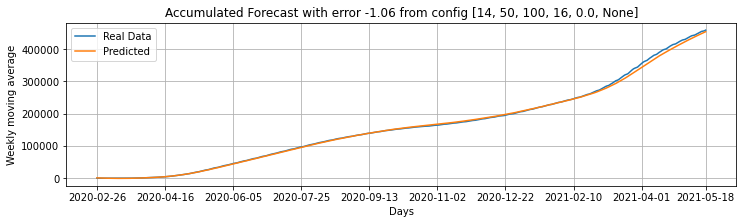

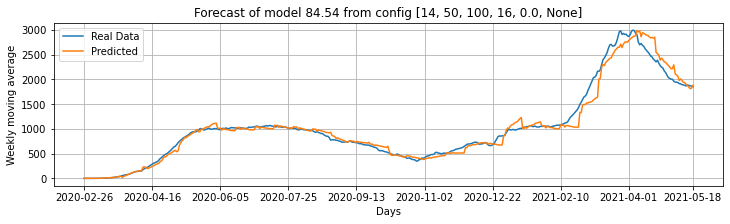

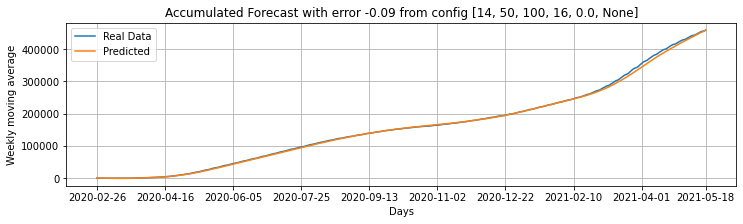

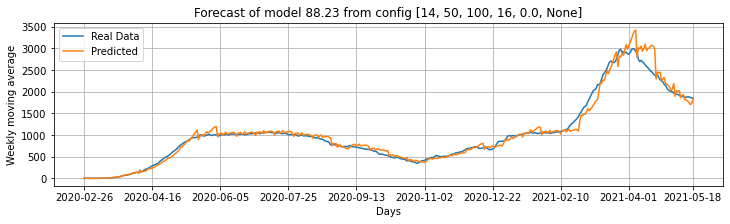

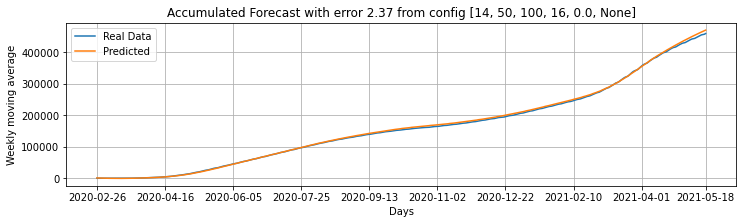

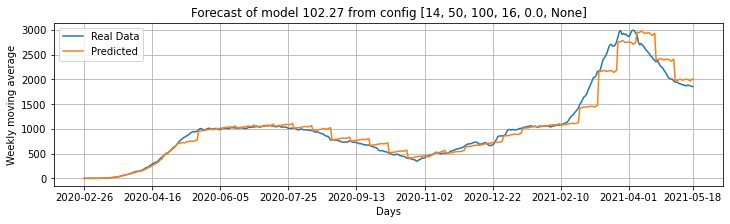

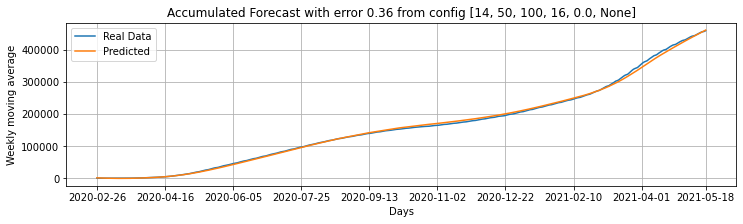

In [38]:
nn.plot_predictions(models, data, models, 5, n_test, df_parameters_seird['Date'].values, data_input_label)

[14, 50, 100, 16, 0.0, None] 183.0205546858057
[14, 50, 100, 16, 0.0, None] 101.86339561975882
[14, 50, 100, 16, 0.0, None] 111.83791284711997
[14, 50, 100, 16, 0.0, None] 121.41976678294601
[14, 50, 100, 16, 0.0, None] 191.03504055211965
[14, 50, 100, 16, 0.0, None] 119.32663860047136
[14, 50, 100, 16, 0.0, None] 348.7706199101352
[14, 50, 100, 16, 0.0, None] 202.21737607708195
[14, 50, 100, 16, 0.0, None] 118.87743984089244
[14, 50, 100, 16, 0.0, None] 349.7214181495037
[14, 50, 100, 16, 0.0, None] 451.909576823727
[14, 50, 100, 16, 0.0, None] 196.69599997521556
[14, 50, 100, 16, 0.0, None] 125.3174991209827
[14, 50, 100, 16, 0.0, None] 497.13532488649406
[14, 50, 100, 16, 0.0, None] 71.50092875270921
[14, 50, 100, 16, 0.0, None] 187.96761481369603
[14, 50, 100, 16, 0.0, None] 378.57780739235096
[14, 50, 100, 16, 0.0, None] 171.11944727112405
[14, 50, 100, 16, 0.0, None] 207.71115950100034
[14, 50, 100, 16, 0.0, None] 148.20441568362597
[14, 50, 100, 16, 0.0, None] 272.5653734657064


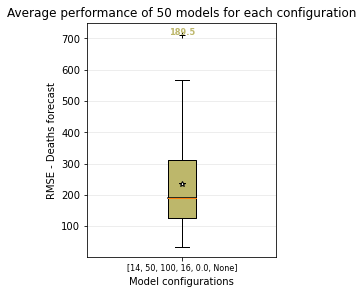

In [39]:
data = data10
data_input_label = 'pc1_pc2'

# guarda scores e configs
scores_grid = list()
# guarda os cinco melhores modelos pra plotar
models = list()

nn.grid_search(data, n_test, config, n_repeats, models, scores_grid)
print('done')
# list top 10 configs
for cfg, error in scores_grid[:1]:
  print(cfg, error)

# plot top configs
score_list, key_list = nn.boxplot_experiments_best(scores_grid, 5, n_repeats, data_input_label)

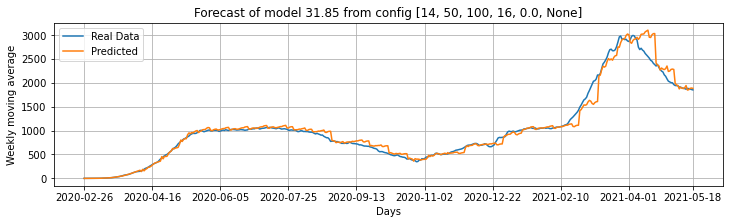

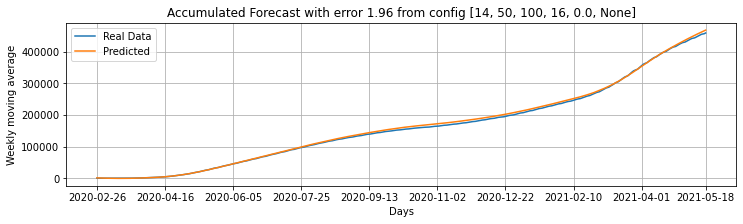

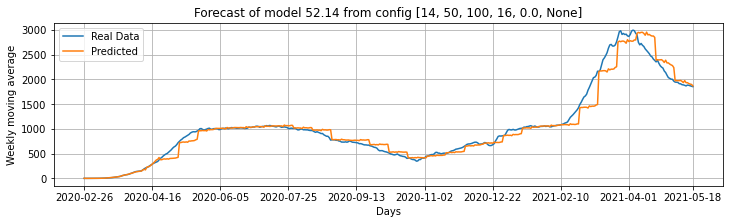

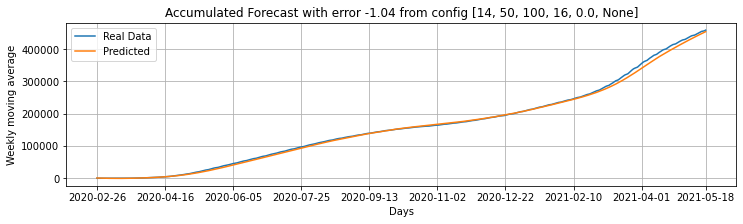

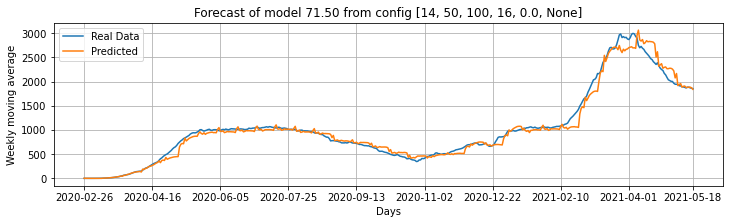

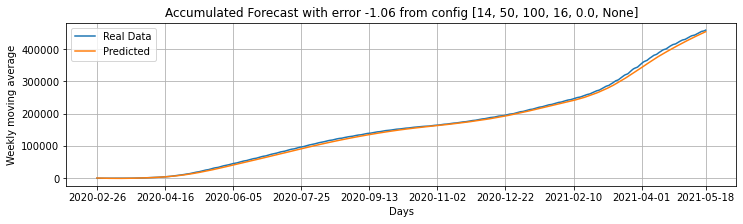

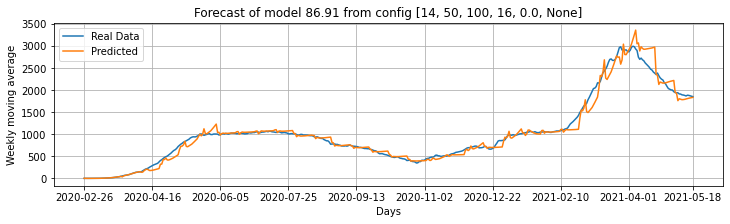

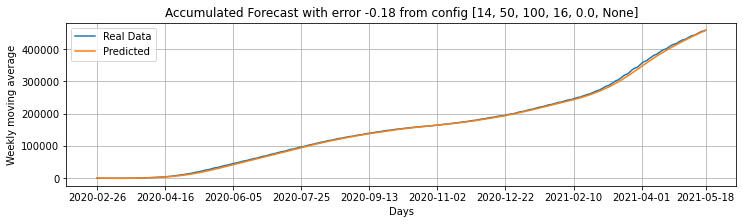

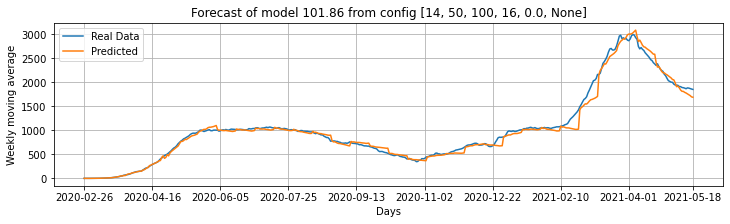

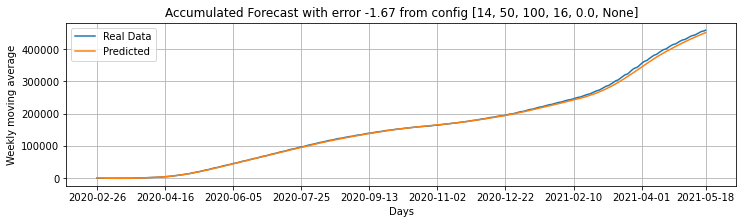

In [40]:
nn.plot_predictions(models, data, models, 5, n_test, df_parameters_seird['Date'].values, data_input_label)

[14, 50, 100, 16, 0.0, None] 61.2037911630838
[14, 50, 100, 16, 0.0, None] 69.99979422402791
[14, 50, 100, 16, 0.0, None] 173.44623851859689
[14, 50, 100, 16, 0.0, None] 212.89906462629187
[14, 50, 100, 16, 0.0, None] 263.24160124304063
[14, 50, 100, 16, 0.0, None] 237.77510382712484
[14, 50, 100, 16, 0.0, None] 197.28983081687207
[14, 50, 100, 16, 0.0, None] 201.68753873566408
[14, 50, 100, 16, 0.0, None] 98.3551590140929
[14, 50, 100, 16, 0.0, None] 294.63473148968706
[14, 50, 100, 16, 0.0, None] 301.7532751479261
[14, 50, 100, 16, 0.0, None] 92.44697593418078
[14, 50, 100, 16, 0.0, None] 212.67470759354532
[14, 50, 100, 16, 0.0, None] 106.64546806768209
[14, 50, 100, 16, 0.0, None] 204.9801819688918
[14, 50, 100, 16, 0.0, None] 319.78387476935103
[14, 50, 100, 16, 0.0, None] 310.0963811865595
[14, 50, 100, 16, 0.0, None] 109.4889807883081
[14, 50, 100, 16, 0.0, None] 190.4270591164764
[14, 50, 100, 16, 0.0, None] 124.26247265113872
[14, 50, 100, 16, 0.0, None] 114.63579812143108
[14

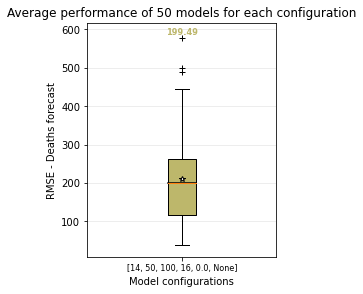

In [41]:
data = data11
data_input_label = 'pc1_pc2_r0'

# guarda scores e configs
scores_grid = list()
# guarda os cinco melhores modelos pra plotar
models = list()

nn.grid_search(data, n_test, config, n_repeats, models, scores_grid)
print('done')
# list top 10 configs
for cfg, error in scores_grid[:1]:
  print(cfg, error)

# plot top configs
score_list, key_list = nn.boxplot_experiments_best(scores_grid, 5, n_repeats, data_input_label)

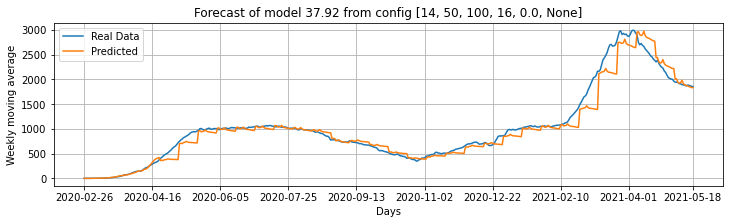

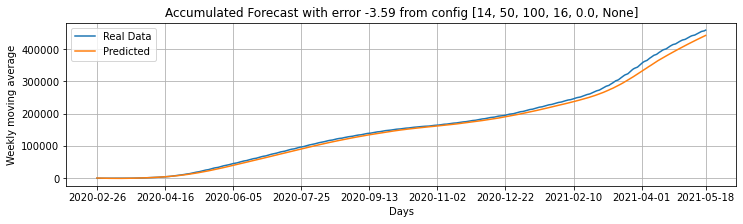

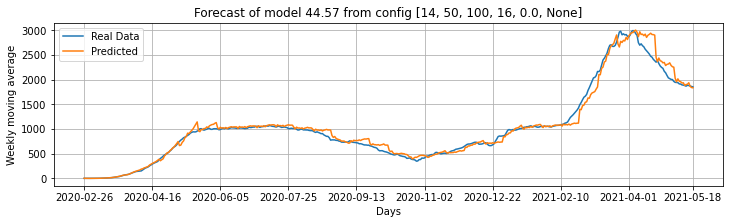

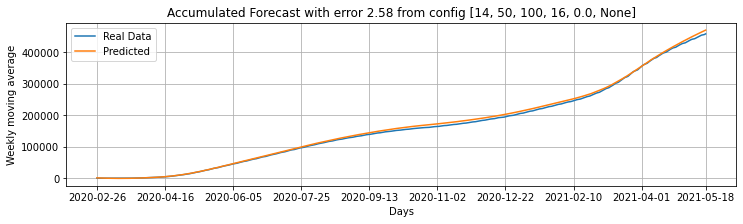

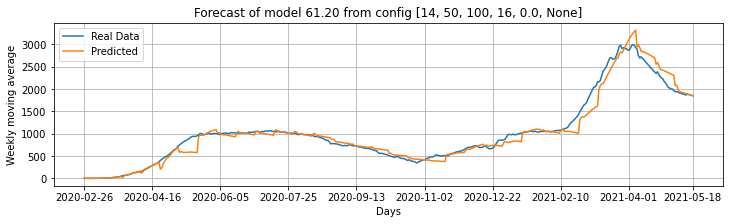

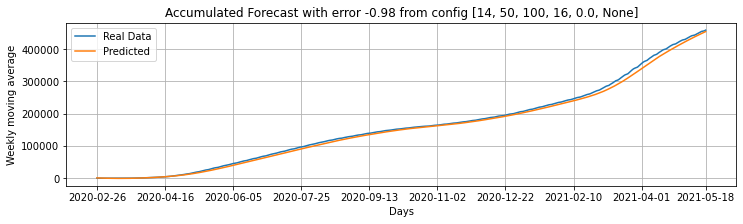

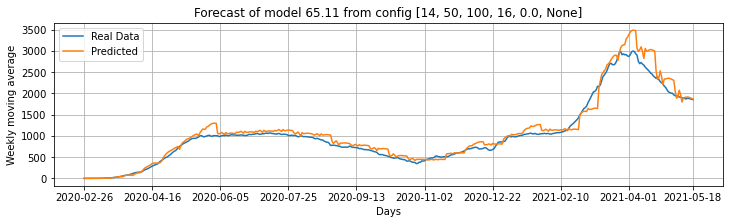

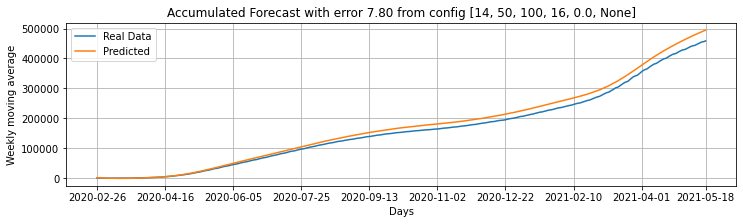

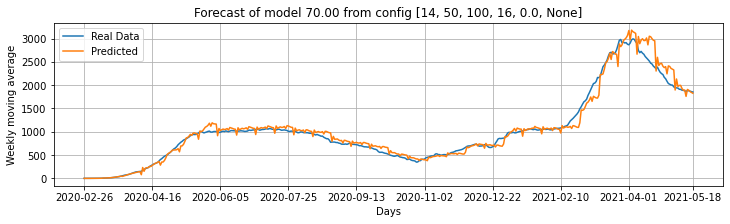

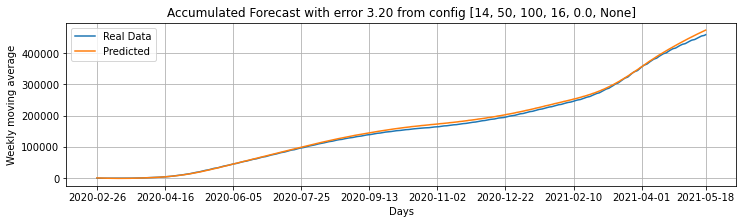

In [42]:
nn.plot_predictions(models, data, models, 5, n_test, df_parameters_seird['Date'].values, data_input_label)

[14, 50, 100, 16, 0.0, None] 191.1893592586941
[14, 50, 100, 16, 0.0, None] 165.53378384411442
[14, 50, 100, 16, 0.0, None] 169.98348380247123
[14, 50, 100, 16, 0.0, None] 74.73492218334077
[14, 50, 100, 16, 0.0, None] 87.53348410661917
[14, 50, 100, 16, 0.0, None] 151.94484633617884
[14, 50, 100, 16, 0.0, None] 87.50136717681902
[14, 50, 100, 16, 0.0, None] 614.1939585749766
[14, 50, 100, 16, 0.0, None] 197.8921640534309
[14, 50, 100, 16, 0.0, None] 175.1144993729103
[14, 50, 100, 16, 0.0, None] 136.3352370995848
[14, 50, 100, 16, 0.0, None] 366.15581126755313
[14, 50, 100, 16, 0.0, None] 230.0007982323105
[14, 50, 100, 16, 0.0, None] 252.24948897371428
[14, 50, 100, 16, 0.0, None] 154.36603592395252
[14, 50, 100, 16, 0.0, None] 119.58192553250889
[14, 50, 100, 16, 0.0, None] 189.2838270626944
[14, 50, 100, 16, 0.0, None] 586.383486934958
[14, 50, 100, 16, 0.0, None] 359.65003605936147
[14, 50, 100, 16, 0.0, None] 189.28206259112352
[14, 50, 100, 16, 0.0, None] 138.9787458458127
[14, 

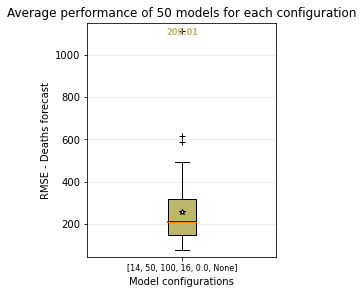

In [43]:
data = data12
data_input_label = 'pc1_pc2_r0_holiday'

# guarda scores e configs
scores_grid = list()
# guarda os cinco melhores modelos pra plotar
models = list()

nn.grid_search(data, n_test, config, n_repeats, models, scores_grid)
print('done')
# list top 10 configs
for cfg, error in scores_grid[:1]:
  print(cfg, error)

# plot top configs
score_list, key_list = nn.boxplot_experiments_best(scores_grid, 5, n_repeats, data_input_label)

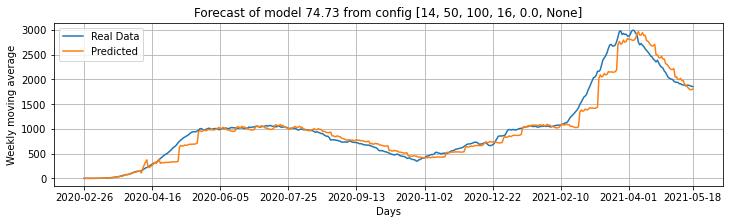

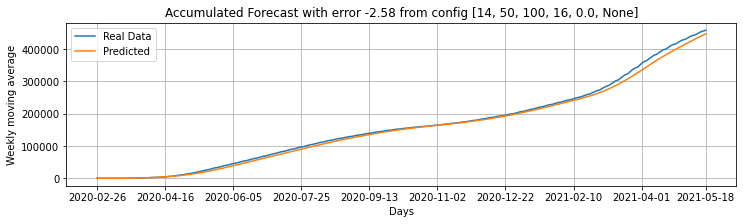

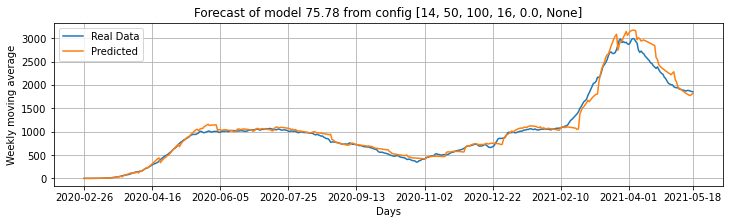

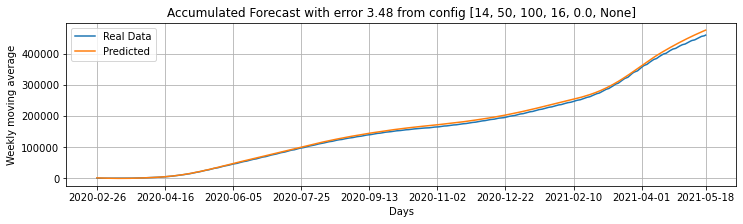

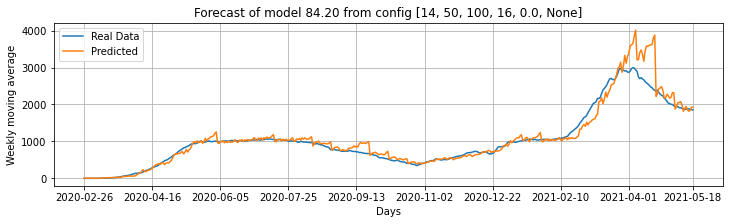

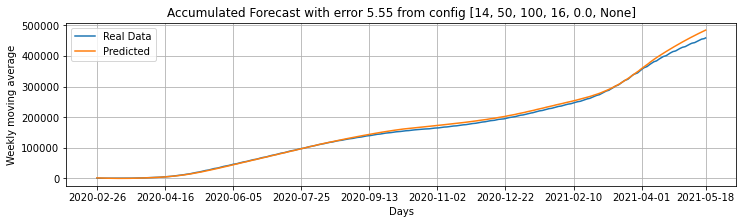

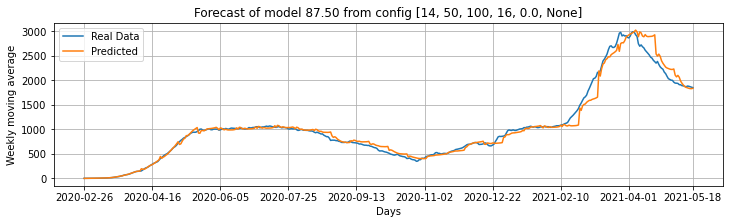

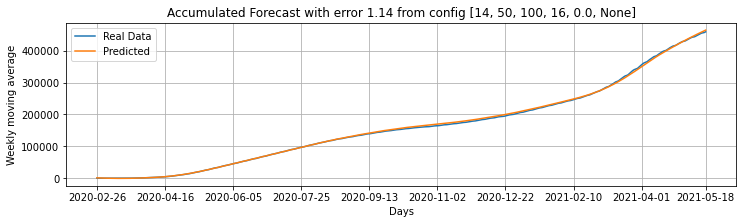

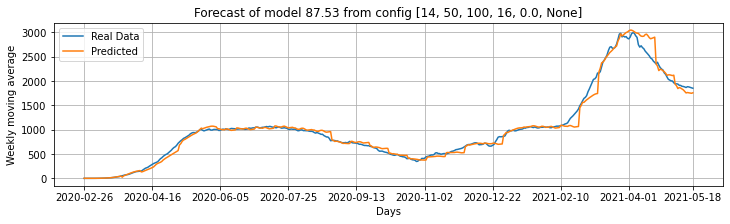

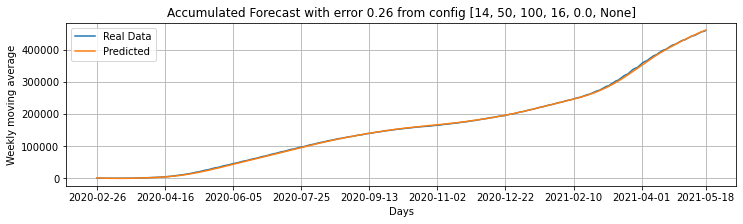

In [44]:
nn.plot_predictions(models, data, models, 5, n_test, df_parameters_seird['Date'].values, data_input_label)